In [19]:
from sklearn.manifold import TSNE
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from tqdm import tqdm
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
from gensim import matutils, models
import scipy.sparse
import string
from collections import Counter
import pyLDAvis.gensim
from gensim import corpora, models, similarities
from gensim.models.ldamulticore import LdaMulticore
from sklearn.decomposition import LatentDirichletAllocation

# Inception

In [20]:
#read in Inception csv
Inception = pd.read_csv('Inception.csv')
Inception.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
Inception.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2011-07-11 19:59:41,Who understands that Inception movie?,en,[],debbie_nthejets,https://twitter.com/debbie_nthejets/status/905...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000
1,2011-07-11 19:59:29,Inception in my pants #improvefilmtitlesbyaddi...,en,['improvefilmtitlesbyaddinginmypants'],MercDeejay,https://twitter.com/MercDeejay/status/90570938...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000
2,2011-07-11 19:59:09,RT @ imNot_daFather #GreatHighMovie Inception,en,['greathighmovie'],Lejailatroi,https://twitter.com/Lejailatroi/status/9057085...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000
3,2011-07-11 19:58:23,never saw inception,en,[],6tacey,https://twitter.com/6tacey/status/905706630473...,False,0,0,1,NaN,0.0000,0.000,0.0,1.000,0.0000
4,2011-07-11 19:57:45,@jck49erfan @Cornholio3000 was inception the o...,en,[],JHScramble,https://twitter.com/JHScramble/status/90570505...,False,0,2,0,NaN,0.4215,0.123,0.0,0.877,0.4215


## Latent Dirichlet Allocation

Latent Dirichlet Allocation is used to break down movie topics from tweets. 

In [21]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in Inception['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [22]:
#creating a stop words list - these words don't add much value

additional_stopwords = ['https', 'I', 'com', 'http', 'RT', 'co', 'the', 'amp', 'the', 'lt', 'A', 'www', 'rt', 'got', 'get', 
                        'ly', 'u']
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += additional_stopwords

# print(stopwords_list)

In [23]:
# isolating every word within tweets for the Inception movie (not including stop words)
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list:
            tweets.append(word)
# tweets

In [24]:
#stemmed tweets
ps = PorterStemmer()

stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    
    stemmed_tweets.append(stemmed_words)

# stemmed_tweets

In [25]:
#add columns into Inception dataframe

#stemmed tweets list
Inception['stemmed'] = stemmed_tweets

#stemmed tweets string
stemmed_tweets_lst = []
for tweet in Inception['stemmed'].tolist():
    stemmed_tweets_lst.append(" ".join(tweet))

Inception['string_stemmed'] = stemmed_tweets_lst

Inception.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2011-07-11 19:59:41,Who understands that Inception movie?,en,[],debbie_nthejets,https://twitter.com/debbie_nthejets/status/905...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000,"[understand, incept, movi]",understand incept movi
1,2011-07-11 19:59:29,Inception in my pants #improvefilmtitlesbyaddi...,en,['improvefilmtitlesbyaddinginmypants'],MercDeejay,https://twitter.com/MercDeejay/status/90570938...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000,"[incept, pant, improvefilmtitlesbyaddinginmyp]",incept pant improvefilmtitlesbyaddinginmyp
2,2011-07-11 19:59:09,RT @ imNot_daFather #GreatHighMovie Inception,en,['greathighmovie'],Lejailatroi,https://twitter.com/Lejailatroi/status/9057085...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000,"[imnot, dafath, greathighmovi, incept]",imnot dafath greathighmovi incept
3,2011-07-11 19:58:23,never saw inception,en,[],6tacey,https://twitter.com/6tacey/status/905706630473...,False,0,0,1,NaN,0.0000,0.000,0.0,1.000,0.0000,"[never, saw, incept]",never saw incept
4,2011-07-11 19:57:45,@jck49erfan @Cornholio3000 was inception the o...,en,[],JHScramble,https://twitter.com/JHScramble/status/90570505...,False,0,2,0,NaN,0.4215,0.123,0.0,0.877,0.4215,"[jck49erfan, cornholio3000, incept, one, leo, ...",jck49erfan cornholio3000 incept one leo patien...


The row numbers represent each tweet and the columns represent every stemmed word tweeted about inception.

In [26]:
# sparse Document Term Matrix

vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(Inception['string_stemmed'].tolist())

# list of words
# vec.get_feature_names()

In [27]:
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
print(df.shape)
df.head()

(5100, 6420)


,000,00a,00pm,02,03zutlg,04gb,07,090,0cdefc1,0dizzl,...,zooeyglass,zookeep,zoveel,zpdfj,zpxw4,zuckerberg,zumba,zvkyj,zw3yz,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(Inception['stemmed'])
type(dictionary)
len(dictionary)

6461

In [29]:
#bag of words (tokenid, tokencount)
corpus = [dictionary.doc2bow(d) for d in Inception['stemmed']]
# corpus

In [30]:
#running LDA model
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
lda.print_topics()

[(0,
  '0.118*"incept" + 0.023*"dream" + 0.020*"movi" + 0.019*"like" + 0.013*"time" + 0.013*"watch" + 0.007*"first" + 0.006*"love" + 0.006*"gonna" + 0.006*"think"'),
 (1,
  '0.067*"incept" + 0.009*"dream" + 0.007*"lol" + 0.006*"dreamin" + 0.005*"watch" + 0.004*"need" + 0.004*"make" + 0.003*"sinc" + 0.003*"call" + 0.003*"gotta"'),
 (2,
  '0.053*"incept" + 0.011*"like" + 0.008*"bit" + 0.007*"island" + 0.007*"movi" + 0.006*"sinc" + 0.006*"shutter" + 0.005*"much" + 0.005*"come" + 0.004*"tire"'),
 (3,
  '0.117*"incept" + 0.052*"watch" + 0.016*"dream" + 0.014*"movi" + 0.010*"good" + 0.007*"go" + 0.006*"lol" + 0.005*"like" + 0.005*"time" + 0.005*"night"'),
 (4,
  '0.234*"pant" + 0.232*"incept" + 0.171*"improvefilmtitlesbyaddinginmyp" + 0.006*"improvemovietitlesbyaddinginmyp" + 0.004*"inmyp" + 0.004*"lol" + 0.002*"gt" + 0.002*"afn" + 0.002*"improvingfilmtitlesbyaddinginmyp" + 0.001*"improvefilmtitlebyaddinginmyp"')]

In [31]:
#clarifying LDA model
for elem in lda.print_topics(-1):
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.118*"incept" + 0.023*"dream" + 0.020*"movi" + 0.019*"like" + 0.013*"time" + 0.013*"watch" + 0.007*"first" + 0.006*"love" + 0.006*"gonna" + 0.006*"think"
Topic 1 
Words: 0.067*"incept" + 0.009*"dream" + 0.007*"lol" + 0.006*"dreamin" + 0.005*"watch" + 0.004*"need" + 0.004*"make" + 0.003*"sinc" + 0.003*"call" + 0.003*"gotta"
Topic 2 
Words: 0.053*"incept" + 0.011*"like" + 0.008*"bit" + 0.007*"island" + 0.007*"movi" + 0.006*"sinc" + 0.006*"shutter" + 0.005*"much" + 0.005*"come" + 0.004*"tire"
Topic 3 
Words: 0.117*"incept" + 0.052*"watch" + 0.016*"dream" + 0.014*"movi" + 0.010*"good" + 0.007*"go" + 0.006*"lol" + 0.005*"like" + 0.005*"time" + 0.005*"night"
Topic 4 
Words: 0.234*"pant" + 0.232*"incept" + 0.171*"improvefilmtitlesbyaddinginmyp" + 0.006*"improvemovietitlesbyaddinginmyp" + 0.004*"inmyp" + 0.004*"lol" + 0.002*"gt" + 0.002*"afn" + 0.002*"improvingfilmtitlesbyaddinginmyp" + 0.001*"improvefilmtitlebyaddinginmyp"


In [32]:
# Display model
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
# vis
# pyLDAvis.save_html(vis, 'images/lda_inception.html')

## T-SNE

In [37]:
print(range(len(corpus)))
#LDA matrix results
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])       
X

range(0, 5100)


[[0.7973825, 0.05031091, 0.050379343, 0.050909873, 0.051017392],
 [0.05024733, 0.050140757, 0.050108295, 0.050243888, 0.7992597],
 [0.04034006, 0.04022681, 0.040196747, 0.8385718, 0.040664576],
 [0.05196599, 0.05031743, 0.050339602, 0.7962724, 0.051104557],
 [0.016910356, 0.016987009, 0.016703784, 0.93263614, 0.016762715],
 [0.37017328, 0.040661205, 0.040218085, 0.040684253, 0.5082632],
 [0.8374836, 0.040634755, 0.04023221, 0.040716007, 0.04093343],
 [0.034142107, 0.8642281, 0.033597343, 0.03398821, 0.034044217],
 [0.0343524, 0.033492334, 0.035194177, 0.8632358, 0.03372536],
 [0.83617884, 0.040506102, 0.040910665, 0.04099995, 0.041404467],
 [0.58504933, 0.016821738, 0.01684026, 0.3645166, 0.01677212],
 [0.05024774, 0.05014079, 0.050108302, 0.05024381, 0.79925936],
 [0.8383716, 0.04025408, 0.040186204, 0.04051251, 0.040675588],
 [0.72802585, 0.06724492, 0.06771534, 0.068033114, 0.0689808],
 [0.898654, 0.025350519, 0.025173916, 0.025505206, 0.02531639],
 [0.9191206, 0.020145316, 0.020279

In [38]:
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

<AxesSubplot:xlabel='x', ylabel='y'>

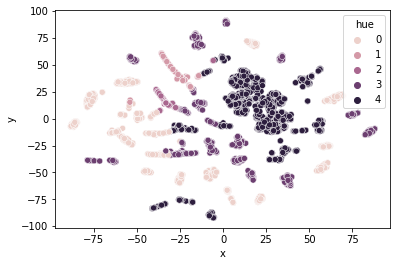

In [39]:
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)

# Ingrid Goes West

## LDA 

In [40]:
#read in Ingrid Goes West csv
IngridGoesWest = pd.read_csv('IngridGoesWest.csv')
IngridGoesWest.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
IngridGoesWest.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2018-08-23 18:50:34,Another day another avocado toast. #avocadotoa...,en,"['avocadotoast', 'ingridgoeswest', '31days31ph...",ShepherdGirl,https://twitter.com/ShepherdGirl/status/103276...,False,0,0,0,NaN,0.0000,0.000,0.000,1.000,0.0000
1,2018-08-23 17:32:00,#IngridGoesWest is a total package when you wa...,en,['ingridgoeswest'],BisiAdediran,https://twitter.com/BisiAdediran/status/103274...,False,0,0,0,NaN,0.3400,0.111,0.062,0.827,0.3400
2,2018-08-23 13:00:47,44. Step 45. The dark tower 46. Ingrid goes we...,en,[],wawalily247,https://twitter.com/wawalily247/status/1032674...,False,0,0,0,NaN,0.4404,0.083,0.000,0.917,0.4404
3,2018-08-23 04:13:02,INGRID GOES WEST [Official Teaser] - August 20...,en,[],ScreenTweet,https://twitter.com/ScreenTweet/status/1032541...,False,0,0,0,NaN,-0.2500,0.000,0.182,0.818,-0.2500
4,2018-08-23 02:50:58,two movies own my whole heart and that is the ...,en,[],didntifade,https://twitter.com/didntifade/status/10325205...,False,1,0,0,NaN,0.6369,0.208,0.000,0.792,0.6369


In [46]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in IngridGoesWest['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
# tokenized_tweets

In [45]:
#stemmed words of tweets
ps = PorterStemmer()

stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    
    stemmed_tweets.append(stemmed_words)

# stemmed_tweets

In [48]:
#add stemmed words into dataframe

#stemmed words list
IngridGoesWest['stemmed'] = stemmed_tweets

#stemmed words tweet
stemmed_tweets_lst = []
for tweet in IngridGoesWest['stemmed'].tolist():
    stemmed_tweets_lst.append(" ".join(tweet))

IngridGoesWest['string_stemmed'] = stemmed_tweets_lst

IngridGoesWest.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2018-08-23 18:50:34,Another day another avocado toast. #avocadotoa...,en,"['avocadotoast', 'ingridgoeswest', '31days31ph...",ShepherdGirl,https://twitter.com/ShepherdGirl/status/103276...,False,0,0,0,NaN,0.0000,0.000,0.000,1.000,0.0000,"[anoth, day, anoth, avocado, toast, avocadotoa...",anoth day anoth avocado toast avocadotoast ing...
1,2018-08-23 17:32:00,#IngridGoesWest is a total package when you wa...,en,['ingridgoeswest'],BisiAdediran,https://twitter.com/BisiAdediran/status/103274...,False,0,0,0,NaN,0.3400,0.111,0.062,0.827,0.3400,"[ingridgoeswest, total, packag, want, advis, s...",ingridgoeswest total packag want advis sorri a...
2,2018-08-23 13:00:47,44. Step 45. The dark tower 46. Ingrid goes we...,en,[],wawalily247,https://twitter.com/wawalily247/status/1032674...,False,0,0,0,NaN,0.4404,0.083,0.000,0.917,0.4404,"[44, step, 45, dark, tower, 46, ingrid, goe, w...",44 step 45 dark tower 46 ingrid goe west 47 na...
3,2018-08-23 04:13:02,INGRID GOES WEST [Official Teaser] - August 20...,en,[],ScreenTweet,https://twitter.com/ScreenTweet/status/1032541...,False,0,0,0,NaN,-0.2500,0.000,0.182,0.818,-0.2500,"[ingrid, goe, west, offici, teaser, august, 20...",ingrid goe west offici teaser august 2017 neon...
4,2018-08-23 02:50:58,two movies own my whole heart and that is the ...,en,[],didntifade,https://twitter.com/didntifade/status/10325205...,False,1,0,0,NaN,0.6369,0.208,0.000,0.792,0.6369,"[two, movi, whole, heart, king, summer, ingrid...",two movi whole heart king summer ingrid goe west


In [49]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(IngridGoesWest['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,01,03,03r1y4v3l2,03ug2g0kfi,05,05mfzdgjrf,06,07,...,zvq9zr3hg,zvvrqycogw,zvyagintsev,zwfil4zopz,zwskaxpq6k,zx6079v1w9,zz31znmrok,zzbhlcobxr,zztd7pzbvc,zztopport
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#dictionary of numbers matched with words
dictionary = corpora.Dictionary(IngridGoesWest['stemmed'])

In [51]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in IngridGoesWest['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

In [52]:
#running LDA model for Ingrid Goes West
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.041*"ingrid" + 0.040*"goe" + 0.040*"west" + 0.040*"dvd" + 0.039*"win" + 0.035*"ingridgoeswest" + 0.024*"heyuguy" + 0.023*"click" + 0.008*"efcompetit" + 0.008*"aubreyplaza"
Topic 1 
Words: 0.073*"ingrid" + 0.070*"goe" + 0.070*"west" + 0.039*"watch" + 0.018*"ingridgoeswest" + 0.018*"movi" + 0.011*"like" + 0.008*"aubrey" + 0.008*"plaza" + 0.007*"evilhag"
Topic 2 
Words: 0.046*"ingrid" + 0.046*"goe" + 0.045*"west" + 0.011*"plaza" + 0.010*"aubrey" + 0.006*"ingridgoeswest" + 0.005*"2017" + 0.005*"film" + 0.005*"obsess" + 0.004*"good"
Topic 3 
Words: 0.058*"ingrid" + 0.058*"goe" + 0.058*"west" + 0.022*"movi" + 0.014*"watch" + 0.010*"good" + 0.010*"ingridgoeswest" + 0.007*"film" + 0.006*"time" + 0.006*"love"
Topic 4 
Words: 0.065*"ingrid" + 0.063*"goe" + 0.062*"west" + 0.016*"ingridgoeswest" + 0.015*"2017" + 0.010*"best" + 0.009*"evilhag" + 0.009*"social" + 0.009*"first" + 0.008*"media"


In [53]:
#Display Ingrid Goes West model
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
# pyLDAvis.save_html(vis, 'images/lda_ingridgoeswest.html')

# 

# Big Sick

In [67]:
#read in the Big Sick
BigSick = pd.read_csv('BigSick.csv')
BigSick.drop(columns=['Unnamed: 0'], axis = 1, inplace = True) 
BigSick.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2018-07-12 19:40:09,@kumailn I just saw the Big Sick and you are a...,en,[],lellomoke,https://twitter.com/lellomoke/status/101755423...,False,0,0,0,0.7384,0.245,0.095,0.660,0.7384
1,2018-07-12 19:25:45,@kumailn Just finished The Big Sick. It was s...,en,[],klingerock,https://twitter.com/klingerock/status/10175506...,False,0,0,0,0.3268,0.274,0.195,0.531,0.3268
2,2018-07-12 19:02:35,I added a video to a @YouTube playlist https:...,en,[],TheRedShamrock,https://twitter.com/TheRedShamrock/status/1017...,False,0,0,0,-0.5106,0.000,0.202,0.798,-0.5106
3,2018-07-12 17:22:11,@kumailn damn why did I just now watch the big...,en,[],hanneskaeufler,https://twitter.com/hanneskaeufler/status/1017...,False,1,1,0,-0.4017,0.172,0.301,0.527,-0.4017
4,2018-07-12 15:39:02,At the beginning of a relationship: “omg you’r...,en,[],EwdatsGROSS,https://twitter.com/EwdatsGROSS/status/1017493...,False,34,0,3,0.0785,0.182,0.176,0.642,0.0785


In [68]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in BigSick['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
# tokenized_tweets

In [70]:
#stemming tweets

stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    
    stemmed_tweets.append(stemmed_words)

# stemmed_tweets

In [71]:
#adding to Big Sick dataframe 

#stemmed tweets list version
BigSick['stemmed'] = stemmed_tweets

#string version
stemmed_tweets_str_lst = []
for tweet in BigSick['stemmed'].tolist():
    stemmed_tweets_str_lst.append(" ".join(tweet))

BigSick['string_stemmed'] = stemmed_tweets_str_lst

BigSick.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2018-07-12 19:40:09,@kumailn I just saw the Big Sick and you are a...,en,[],lellomoke,https://twitter.com/lellomoke/status/101755423...,False,0,0,0,0.7384,0.245,0.095,0.660,0.7384,"[kumailn, saw, big, sick, amaz, happi, wife, r...",kumailn saw big sick amaz happi wife recov
1,2018-07-12 19:25:45,@kumailn Just finished The Big Sick. It was s...,en,[],klingerock,https://twitter.com/klingerock/status/10175506...,False,0,0,0,0.3268,0.274,0.195,0.531,0.3268,"[kumailn, finish, big, sick, fuck, good]",kumailn finish big sick fuck good
2,2018-07-12 19:02:35,I added a video to a @YouTube playlist https:...,en,[],TheRedShamrock,https://twitter.com/TheRedShamrock/status/1017...,False,0,0,0,-0.5106,0.000,0.202,0.798,-0.5106,"[ad, video, youtub, playlist, 3oxcf1nudi, s5e2...",ad video youtub playlist 3oxcf1nudi s5e29 2017...
3,2018-07-12 17:22:11,@kumailn damn why did I just now watch the big...,en,[],hanneskaeufler,https://twitter.com/hanneskaeufler/status/1017...,False,1,1,0,-0.4017,0.172,0.301,0.527,-0.4017,"[kumailn, damn, watch, big, sick, realli, enjoy]",kumailn damn watch big sick realli enjoy
4,2018-07-12 15:39:02,At the beginning of a relationship: “omg you’r...,en,[],EwdatsGROSS,https://twitter.com/EwdatsGROSS/status/1017493...,False,34,0,3,0.0785,0.182,0.176,0.642,0.0785,"[begin, relationship, omg, funni, love, sens, ...",begin relationship omg funni love sens humour ...


In [72]:
# sparse Document Term Matrix

vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(BigSick['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,007,00pm,01,02,025,02uemq83hd,03,03mz3dbxtl,...,ztbqrlfr7j,zto8ktfnwv,ztxyln1gso,zucchini,zucker,zumanurr,zve60sra4b,zw1ukjimji,zy3pcbgrrv,zzo9yhxcjp
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(BigSick['stemmed'])

In [74]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in BigSick['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

In [75]:
#running LDA model for The Big Sick
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
#created a for loop to seperate Topic and Words for clairty
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.079*"big" + 0.078*"sick" + 0.009*"showalt" + 0.009*"comedi" + 0.009*"michael" + 0.007*"kumailn" + 0.006*"love" + 0.006*"littl" + 0.006*"2017" + 0.005*"amazon"
Topic 1 
Words: 0.065*"big" + 0.061*"sick" + 0.019*"kumailn" + 0.008*"movi" + 0.007*"watch" + 0.007*"final" + 0.006*"stori" + 0.006*"love" + 0.006*"good" + 0.005*"10"
Topic 2 
Words: 0.059*"big" + 0.058*"sick" + 0.021*"watch" + 0.014*"love" + 0.010*"film" + 0.007*"movi" + 0.006*"kumailn" + 0.006*"like" + 0.006*"10" + 0.006*"kumail"
Topic 3 
Words: 0.041*"sick" + 0.040*"big" + 0.008*"2017" + 0.007*"video" + 0.007*"love" + 0.006*"youtub" + 0.006*"watch" + 0.005*"go" + 0.004*"like" + 0.004*"movi"
Topic 4 
Words: 0.082*"big" + 0.082*"sick" + 0.025*"watch" + 0.024*"movi" + 0.019*"kumailn" + 0.009*"like" + 0.009*"love" + 0.009*"good" + 0.007*"great" + 0.007*"time"


In [76]:
#Display Big Sick LDA
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.038258 -0.055651       1        1  42.097195
2      0.036202 -0.009578       2        1  18.778078
0     -0.112646 -0.062939       3        1  16.116453
1      0.081355  0.007378       4        1  14.919285
3     -0.043168  0.120790       5        1   8.088990, topic_info=        Term         Freq        Total Category  logprob  loglift
1        big  4836.000000  4836.000000  Default  30.0000  30.0000
6       sick  4761.000000  4761.000000  Default  29.0000  29.0000
381  showalt   109.000000   109.000000  Default  28.0000  28.0000
21     watch  1088.000000  1088.000000  Default  27.0000  27.0000
380  michael   117.000000   117.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
106    first    11.260586   105.350285   Topic5  -6.1880   0.2787
268   kumail    12.927210   314.479126   Topic5  -6.0500  -0.6769
623    stori    11.713224   194.550140   Topic5  -6.1486  -0.2953
206     time    11.918083   277.008847   Topic5  -6.1313  -0.6313
10      good    11.332935   414.099292   Topic5  -6.1816  -1.0837

[375 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
6585      1  0.930478  0utxlznydf
296       1  0.056484          10
296       2  0.445598          10
296       3  0.138073          10
296       4  0.338906          10
...     ...       ...         ...
3653      3  0.812931        zayn
1519      1  0.247779         zoe
1519      2  0.027531         zoe
1519      4  0.357903         zoe
1519      5  0.357903         zoe

[811 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 1, 2, 4])

## Big Sick TSNE 

In [79]:
print(range(len(corpus)))
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

range(0, 5349)


In [80]:
hm = np.array(X)
hm

array([[0.02257109, 0.02263078, 0.02252339, 0.02242264, 0.90985215],
       [0.02917722, 0.02907845, 0.02905517, 0.02876193, 0.8839272 ],
       [0.0202929 , 0.35794362, 0.02022122, 0.5812407 , 0.02030154],
       ...,
       [0.01690033, 0.01689948, 0.01695085, 0.01686526, 0.932384  ],
       [0.01068592, 0.01082485, 0.49286982, 0.09011065, 0.39550877],
       [0.01837016, 0.759168  , 0.01840798, 0.0184263 , 0.18562753]],
      dtype=float32)

In [81]:
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(hm)
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = hm.argmax(axis=1)

<AxesSubplot:xlabel='x', ylabel='y'>

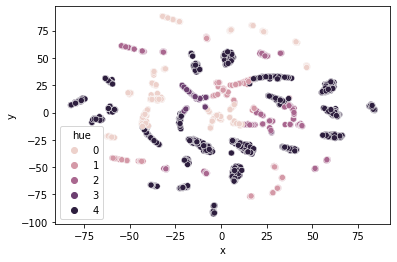

In [82]:
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding
)

# Gone Girl

## LDA

In [83]:
#read in Gone Girl csv
GoneGirl = pd.read_csv('GoneGirl.csv')
GoneGirl.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
GoneGirl.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2015-10-01 19:49:05,(#UntilDawn spoilers) HE GONE GIRL'D HIS PHALA...,en,['untildawn'],bradyonetta,https://twitter.com/bradyonetta/status/6497327...,False,1,1,0,"{'neg': 0.299, 'neu': 0.701, 'pos': 0.0, 'comp...",0.000,0.299,0.701,-0.5904
1,2015-10-01 19:48:58,@chlomeganda gone girl chloeeee :),en,[],ChanwooCheeks,https://twitter.com/ChanwooCheeks/status/64973...,False,0,1,0,"{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...",0.429,0.000,0.571,0.4588
2,2015-10-01 19:48:09,"(#UntilDawn spoilers) OPEN THE BEAR TRAP, CRY....",en,['untildawn'],bradyonetta,https://twitter.com/bradyonetta/status/6497325...,False,0,1,0,"{'neg': 0.407, 'neu': 0.593, 'pos': 0.0, 'comp...",0.000,0.407,0.593,-0.7824
3,2015-10-01 19:46:52,Suspect indicted in Vallejo 'Gone Girl' kidnap...,en,[],OmarAzimi,https://twitter.com/OmarAzimi/status/649732240...,False,1,0,0,"{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",0.000,0.104,0.896,-0.2960
4,2015-10-01 19:45:48,Gone Girl is a fucking crazy movie #thumbsup,en,['thumbsup'],kempatsu,https://twitter.com/kempatsu/status/6497319736...,False,1,0,0,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...",0.000,0.278,0.722,-0.4005


In [85]:
#tokenizing each tweet
tokenized_tweets_GoneGirl = []
for tweet in GoneGirl['tweet']:
    tokenized_tweets_GoneGirl.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
# tokenized_tweets_GoneGirl

In [86]:
#stemming each tweet
stemmed_tweets=[]
for tweet in tokenized_tweets_GoneGirl:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    stemmed_tweets.append(stemmed_words)

# stemmed_tweets

[['untildawn',
  'spoiler',
  'gone',
  'girl',
  'phalang',
  'enough',
  'cri',
  'enough'],
 ['chlomeganda', 'gone', 'girl', 'chloeeee'],
 ['untildawn',
  'spoiler',
  'open',
  'bear',
  'trap',
  'cri',
  'gone',
  'girl',
  'phalang'],
 ['suspect',
  'indict',
  'vallejo',
  'gone',
  'girl',
  'kidnap',
  'case',
  'harvard',
  'law',
  'school',
  'graduat',
  'former',
  'marin',
  'nfjshwvee9'],
 ['gone', 'girl', 'fuck', 'crazi', 'movi', 'thumbsup'],
 ['gone', 'girl', 'movi', 'mess', 'weird', 'good'],
 ['breakingnew',
  'suspect',
  'indict',
  'mysteri',
  'gone',
  'girl',
  'kidnap',
  'case',
  'vallejo',
  '1bhrjbcu5q'],
 ['love', 'gone', 'girl', 'srri'],
 ['book', 'gone', 'girl', 'fz3esjr7dd', 'wlcauthor', 'scifibook'],
 ['adamberri',
  'hayleyqpr',
  'never',
  'swear',
  'twitter',
  'thought',
  'shit',
  'mate',
  'mayb',
  'critic',
  'see',
  'someth',
  'didnt',
  'gonegirl'],
 ['mr',
  'drw',
  'read',
  'ladi',
  'gone',
  'girl',
  'book',
  'gillian',
  'some

In [87]:
#adding to Gone Girl dataframe 

#stemmed tweets list version
GoneGirl['stemmed'] = stemmed_tweets

#string version
stemmed_tweets_str_lst = []
for tweet in GoneGirl['stemmed'].tolist():
    stemmed_tweets_str_lst.append(" ".join(tweet))

GoneGirl['string_stemmed'] = stemmed_tweets_str_lst

GoneGirl.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2015-10-01 19:49:05,(#UntilDawn spoilers) HE GONE GIRL'D HIS PHALA...,en,['untildawn'],bradyonetta,https://twitter.com/bradyonetta/status/6497327...,False,1,1,0,"{'neg': 0.299, 'neu': 0.701, 'pos': 0.0, 'comp...",0.000,0.299,0.701,-0.5904,"[untildawn, spoiler, gone, girl, phalang, enou...",untildawn spoiler gone girl phalang enough cri...
1,2015-10-01 19:48:58,@chlomeganda gone girl chloeeee :),en,[],ChanwooCheeks,https://twitter.com/ChanwooCheeks/status/64973...,False,0,1,0,"{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...",0.429,0.000,0.571,0.4588,"[chlomeganda, gone, girl, chloeeee]",chlomeganda gone girl chloeeee
2,2015-10-01 19:48:09,"(#UntilDawn spoilers) OPEN THE BEAR TRAP, CRY....",en,['untildawn'],bradyonetta,https://twitter.com/bradyonetta/status/6497325...,False,0,1,0,"{'neg': 0.407, 'neu': 0.593, 'pos': 0.0, 'comp...",0.000,0.407,0.593,-0.7824,"[untildawn, spoiler, open, bear, trap, cri, go...",untildawn spoiler open bear trap cri gone girl...
3,2015-10-01 19:46:52,Suspect indicted in Vallejo 'Gone Girl' kidnap...,en,[],OmarAzimi,https://twitter.com/OmarAzimi/status/649732240...,False,1,0,0,"{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",0.000,0.104,0.896,-0.2960,"[suspect, indict, vallejo, gone, girl, kidnap,...",suspect indict vallejo gone girl kidnap case h...
4,2015-10-01 19:45:48,Gone Girl is a fucking crazy movie #thumbsup,en,['thumbsup'],kempatsu,https://twitter.com/kempatsu/status/6497319736...,False,1,0,0,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...",0.000,0.278,0.722,-0.4005,"[gone, girl, fuck, crazi, movi, thumbsup]",gone girl fuck crazi movi thumbsup


In [88]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(GoneGirl['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000th,01,02,039,04utpoqzdk,06izylta51,06zxxykdsj,07wgg3sjh9,08fi9pg6oi,...,zt,zta9g7kncl,ztksz6zurr,zulaikhafadir,zulfikamohd,zurich,zusak,zv7jly9wel,zvuwfji59v,zzts2ihfdp
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
#numbers to words dictionary
dictionary = corpora.Dictionary(GoneGirl['stemmed'])

In [90]:
#bag of words
corpus = []
for tweet in GoneGirl['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

In [91]:
#running LDA model
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.048*"gone" + 0.048*"girl" + 0.048*"gonegirl" + 0.021*"book" + 0.017*"watch" + 0.016*"28" + 0.013*"ladymaryordi" + 0.013*"abeymarindo" + 0.012*"movi" + 0.010*"read"
Topic 1 
Words: 0.107*"girl" + 0.105*"gone" + 0.017*"watch" + 0.013*"gillian" + 0.013*"flynn" + 0.009*"book" + 0.009*"read" + 0.008*"film" + 0.007*"nw" + 0.007*"gonegirl"
Topic 2 
Words: 0.090*"gone" + 0.088*"girl" + 0.019*"movi" + 0.013*"ben" + 0.012*"affleck" + 0.012*"2014" + 0.011*"pike" + 0.010*"rosamund" + 0.008*"gonegirl" + 0.007*"youtub"
Topic 3 
Words: 0.158*"girl" + 0.141*"gone" + 0.045*"watch" + 0.026*"movi" + 0.012*"good" + 0.012*"like" + 0.012*"train" + 0.011*"crazi" + 0.010*"join" + 0.010*"fuck"
Topic 4 
Words: 0.081*"girl" + 0.078*"gone" + 0.018*"love" + 0.014*"read" + 0.012*"movi" + 0.009*"last" + 0.007*"good" + 0.007*"book" + 0.007*"amaz" + 0.006*"realli"


In [92]:
#Display Gone Girl LDA model
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.116864  0.071445       1        1  34.930527
1     -0.001900  0.057453       2        1  21.993371
0     -0.126092  0.018186       3        1  15.599744
2      0.044203 -0.139908       4        1  14.138076
4     -0.033075 -0.007176       5        1  13.338283, topic_info=         Term        Freq       Total Category  logprob  loglift
43   gonegirl  464.000000  464.000000  Default  30.0000  30.0000
717        28  101.000000  101.000000  Default  29.0000  29.0000
36       book  265.000000  265.000000  Default  28.0000  28.0000
34       love  199.000000  199.000000  Default  27.0000  27.0000
98      watch  916.000000  916.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
226       ami   21.736241   99.132038   Topic5  -5.4988   0.4971
94       time   24.779705  191.659020   Topic5  -5.3677  -0.0312
43   gonegirl   23.406750  464.327582   Topic5  -5.4247  -0.9730
433      need   14.486599   55.944228   Topic5  -5.9045   0.6634
321     first   14.652011   81.232860   Topic5  -5.8932   0.3018

[319 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
616       1  0.108159      10
616       2  0.180265      10
616       3  0.216319      10
616       4  0.468690      10
275       3  0.326510      11
...     ...       ...     ...
486       2  0.524331    year
486       3  0.272652    year
486       5  0.062920    year
673       3  0.044189  youtub
673       4  0.927972  youtub

[539 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3, 5])

## TSNE 

In [94]:
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [95]:
hm = np.array(X)
hm

array([[0.02246156, 0.02243878, 0.9100934 , 0.02264295, 0.02236331],
       [0.04033058, 0.04073239, 0.8372609 , 0.04113187, 0.04054422],
       [0.02014001, 0.02017359, 0.9193465 , 0.0202261 , 0.02011374],
       ...,
       [0.06733241, 0.06824449, 0.06795946, 0.7286596 , 0.06780402],
       [0.01823272, 0.92689514, 0.01827133, 0.01832869, 0.01827211],
       [0.01823272, 0.9268947 , 0.0182713 , 0.0183291 , 0.01827215]],
      dtype=float32)

In [97]:
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(hm)
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = hm.argmax(axis=1)

<AxesSubplot:xlabel='x', ylabel='y'>

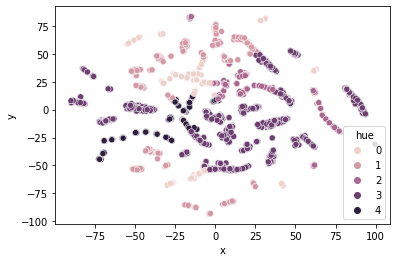

In [98]:
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding
)

# 17 Again

## LDA 

In [99]:
#read in 17 Again
Again17 = pd.read_csv('Again17.csv')
Again17.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
Again17.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2010-04-12 19:44:15,http://bit.ly/bqye6j where can i get a dress ...,en,[],MarleneJenkins,https://twitter.com/MarleneJenkins/status/1207...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
1,2010-04-12 19:28:20,watching 17 Again. :) i missed this movie.,en,[],EuniceHilario,https://twitter.com/EuniceHilario/status/12072...,False,0,0,0,"{'neg': 0.196, 'neu': 0.536, 'pos': 0.268, 'co...",0.268,0.196,0.536,0.2023
2,2010-04-12 19:27:47,"@conallen haha not surprising. ""17 Again"" seem...",en,[],sunnyjac0b,https://twitter.com/sunnyjac0b/status/12072044784,False,0,0,0,"{'neg': 0.076, 'neu': 0.675, 'pos': 0.249, 'co...",0.249,0.076,0.675,0.6232
3,2010-04-12 19:25:32,"@tjlyricz just gonna watch 17 again, and you g...",en,[],desireefurlong,https://twitter.com/desireefurlong/status/1207...,False,0,0,0,"{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'comp...",0.136,0.000,0.864,0.4588
4,2010-04-12 19:21:54,@jacobjunior7 yeah more boyish then which is w...,en,[],conallen,https://twitter.com/conallen/status/12071772509,False,0,0,0,"{'neg': 0.082, 'neu': 0.709, 'pos': 0.21, 'com...",0.210,0.082,0.709,0.4552


In [101]:
#tokenizing each tweet
tokenized_tweets_17Again = []
for tweet in Again17['tweet']:
    tokenized_tweets_17Again.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
# tokenized_tweets_17Again

In [103]:
#stemming tweets
stemmed_tweets=[]
for tweet in tokenized_tweets_17Again:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    stemmed_tweets.append(stemmed_words)

# stemmed_tweets

In [104]:
#adding to 17 Again to dataframe 

#stemmed tweets list version
Again17['stemmed'] = stemmed_tweets

#string version
stemmed_tweets_str_lst = []
for tweet in Again17['stemmed'].tolist():
    stemmed_tweets_str_lst.append(" ".join(tweet))

Again17['string_stemmed'] = stemmed_tweets_str_lst

Again17.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2010-04-12 19:44:15,http://bit.ly/bqye6j where can i get a dress ...,en,[],MarleneJenkins,https://twitter.com/MarleneJenkins/status/1207...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[bit, bqye6j, dress, similar, zac, posen, dres...",bit bqye6j dress similar zac posen dress vanes...
1,2010-04-12 19:28:20,watching 17 Again. :) i missed this movie.,en,[],EuniceHilario,https://twitter.com/EuniceHilario/status/12072...,False,0,0,0,"{'neg': 0.196, 'neu': 0.536, 'pos': 0.268, 'co...",0.268,0.196,0.536,0.2023,"[watch, 17, miss, movi]",watch 17 miss movi
2,2010-04-12 19:27:47,"@conallen haha not surprising. ""17 Again"" seem...",en,[],sunnyjac0b,https://twitter.com/sunnyjac0b/status/12072044784,False,0,0,0,"{'neg': 0.076, 'neu': 0.675, 'pos': 0.249, 'co...",0.249,0.076,0.675,0.6232,"[conallen, haha, surpris, 17, seem, trigger, q...",conallen haha surpris 17 seem trigger quit con...
3,2010-04-12 19:25:32,"@tjlyricz just gonna watch 17 again, and you g...",en,[],desireefurlong,https://twitter.com/desireefurlong/status/1207...,False,0,0,0,"{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'comp...",0.136,0.000,0.864,0.4588,"[tjlyricz, gonna, watch, 17, gotta, loov, late...",tjlyricz gonna watch 17 gotta loov late night ...
4,2010-04-12 19:21:54,@jacobjunior7 yeah more boyish then which is w...,en,[],conallen,https://twitter.com/conallen/status/12071772509,False,0,0,0,"{'neg': 0.082, 'neu': 0.709, 'pos': 0.21, 'com...",0.210,0.082,0.709,0.4552,"[jacobjunior7, yeah, boyish, realli, pay, atte...",jacobjunior7 yeah boyish realli pay attent saw...


In [105]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(Again17['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,01,02,021010,03,04,05,06,07,08,...,zoeblais2010zo,zomg,zone,zoo,zoom,zoradarosa,zqaddict,zxfsb,zzzdaria,zzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(Again17['stemmed'])

In [107]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in Again17['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

In [108]:
#running LDA model for the movie 17 Again
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.089*"17" + 0.038*"zac" + 0.034*"efron" + 0.015*"movi" + 0.015*"love" + 0.008*"like" + 0.008*"make" + 0.006*"3" + 0.006*"hot" + 0.006*"feel"
Topic 1 
Words: 0.140*"17" + 0.094*"watch" + 0.050*"movi" + 0.016*"love" + 0.014*"good" + 0.009*"like" + 0.009*"zac" + 0.008*"17again" + 0.007*"go" + 0.007*"efron"
Topic 2 
Words: 0.105*"17" + 0.053*"watch" + 0.025*"zac" + 0.020*"efron" + 0.012*"movi" + 0.008*"think" + 0.007*"love" + 0.007*"time" + 0.006*"im" + 0.006*"back"
Topic 3 
Words: 0.106*"17" + 0.027*"watch" + 0.022*"like" + 0.017*"lol" + 0.016*"zac" + 0.015*"efron" + 0.011*"movi" + 0.011*"watchin" + 0.009*"feel" + 0.008*"look"
Topic 4 
Words: 0.069*"17" + 0.050*"zoeblai" + 0.025*"4" + 0.022*"win" + 0.021*"tweet" + 0.020*"beauti" + 0.020*"person" + 0.019*"pack" + 0.019*"prize" + 0.019*"piec"


In [109]:
#display LDA model for the movie 17 Again
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.065973  0.091192       1        1  26.389926
3     -0.045953 -0.004115       2        1  23.697012
2     -0.051737  0.030950       3        1  21.696412
0     -0.045471 -0.126123       4        1  16.733450
4      0.209134  0.008097       5        1  11.483201, topic_info=         Term         Freq        Total Category  logprob  loglift
13      watch  1758.000000  1758.000000  Default  30.0000  30.0000
4943  zoeblai   233.000000   233.000000  Default  29.0000  29.0000
524         4   120.000000   120.000000  Default  28.0000  28.0000
10        zac   726.000000   726.000000  Default  27.0000  27.0000
12       movi   853.000000   853.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
34        lol    15.706615   319.336923   Topic5  -5.6886  -0.8479
413         x    10.236768    50.822739   Topic5  -6.1167   0.5619
207     funni    10.647547   110.367564   Topic5  -6.0774  -0.1742
271       omg     9.860626    67.291447   Topic5  -6.1542   0.2438
129      time    10.206762   155.407465   Topic5  -6.1197  -0.5587

[365 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
4956      3  0.011544    100th
4956      5  0.981267    100th
2089      5  0.915837      124
352       1  0.200095       15
352       2  0.050024       15
...     ...       ...      ...
10        4  0.353845      zac
10        5  0.002754      zac
4943      3  0.004290  zoeblai
4943      5  0.991068  zoeblai
1203      2  0.784215    zxfsb

[703 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1, 5])

## TSNE 

In [111]:
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [112]:
hm = np.array(X)
hm

array([[0.48405293, 0.4754414 , 0.01346132, 0.01352259, 0.01352176],
       [0.04126237, 0.83709705, 0.04079958, 0.0406706 , 0.04017036],
       [0.02017512, 0.9190821 , 0.02016767, 0.02050537, 0.02006973],
       ...,
       [0.3100791 , 0.02582113, 0.61371887, 0.02526937, 0.02511154],
       [0.03377623, 0.8640083 , 0.03426934, 0.03404718, 0.03389895],
       [0.4703725 , 0.02024167, 0.46863002, 0.02064234, 0.02011346]],
      dtype=float32)

In [113]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(hm)
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = hm.argmax(axis=1)

<AxesSubplot:xlabel='x', ylabel='y'>

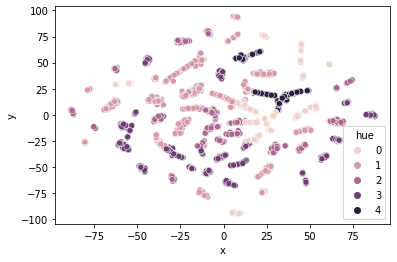

In [114]:
#plot reduce dimensionality for the movie 17 Again
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding
)

# Jennifer's Body

## LDA 

In [115]:
#read in the Big Sick
JennifersBody = pd.read_csv('JennifersBody.csv')
JennifersBody.drop(columns=['Unnamed: 0'], axis = 1, inplace = True) 
JennifersBody.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2010-09-16 19:57:28,I'll wear my Jennifer's Body shirt and red and...,en,[],gogoalexranger,https://twitter.com/gogoalexranger/status/2470...,False,0,0,0,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...",0.189,0.000,0.811,0.5411
1,2010-09-16 18:40:07,"Watching Jennifer's Body with Erin & Jess, the...",en,[],dull_life,https://twitter.com/dull_life/status/24703649087,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
2,2010-09-16 17:22:37,Ok I just threw up some black ropey stuff like...,en,[],advocatediaboli,https://twitter.com/advocatediaboli/status/246...,False,0,0,0,"{'neg': 0.29, 'neu': 0.532, 'pos': 0.178, 'com...",0.178,0.290,0.532,-0.6037
3,2010-09-16 16:59:37,The Jennifer's Body soundtrack is so good. If ...,en,[],TheKatValentine,https://twitter.com/TheKatValentine/status/246...,False,0,0,0,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.223,0.000,0.777,0.5777
4,2010-09-16 16:05:32,'Jennifer's body' is possibly one of the worst...,en,[],_BeckyHart,https://twitter.com/_BeckyHart/status/24693353486,False,0,0,0,"{'neg': 0.258, 'neu': 0.742, 'pos': 0.0, 'comp...",0.000,0.258,0.742,-0.8070


In [116]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in JennifersBody['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
# tokenized_tweets

[['i',
  'll',
  'wear',
  'my',
  'jennifer',
  's',
  'body',
  'shirt',
  'and',
  'red',
  'and',
  'black',
  'scarf',
  'for',
  'tomorrow',
  'they',
  're',
  'red'],
 ['watching',
  'jennifer',
  's',
  'body',
  'with',
  'erin',
  'jess',
  'then',
  'making',
  'breakfast',
  'for',
  'dinner',
  'watching',
  'project',
  'runway'],
 ['ok',
  'i',
  'just',
  'threw',
  'up',
  'some',
  'black',
  'ropey',
  'stuff',
  'like',
  'jennifer',
  's',
  'body',
  'styles',
  'wtf',
  'is',
  'wrong',
  'with',
  'me'],
 ['the',
  'jennifer',
  's',
  'body',
  'soundtrack',
  'is',
  'so',
  'good',
  'if',
  'only',
  'the',
  'movie',
  'was',
  'as',
  'decent'],
 ['jennifer',
  's',
  'body',
  'is',
  'possibly',
  'one',
  'of',
  'the',
  'worst',
  'films',
  'i',
  've',
  'watched',
  'this',
  'year',
  'it',
  'was',
  'unbelievably',
  'dreadful',
  'i',
  'wouldn',
  't',
  'advise',
  'you',
  'watch',
  'it'],
 ['rjvelascooo', 'sounds', 'something', 'a', 'la',

In [118]:
#stemming tweets
stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    stemmed_tweets.append(stemmed_words)

# stemmed_tweets

In [119]:
#adding to Jennifer's Body dataframe 

#stemmed tweets list version
JennifersBody['stemmed'] = stemmed_tweets

#string version
stemmed_tweets_str_lst = []
for tweet in JennifersBody['stemmed'].tolist():
    stemmed_tweets_str_lst.append(" ".join(tweet))

JennifersBody['string_stemmed'] = stemmed_tweets_str_lst

JennifersBody.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2010-09-16 19:57:28,I'll wear my Jennifer's Body shirt and red and...,en,[],gogoalexranger,https://twitter.com/gogoalexranger/status/2470...,False,0,0,0,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...",0.189,0.000,0.811,0.5411,"[wear, jennif, bodi, shirt, red, black, scarf,...",wear jennif bodi shirt red black scarf tomorro...
1,2010-09-16 18:40:07,"Watching Jennifer's Body with Erin & Jess, the...",en,[],dull_life,https://twitter.com/dull_life/status/24703649087,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[watch, jennif, bodi, erin, jess, make, breakf...",watch jennif bodi erin jess make breakfast din...
2,2010-09-16 17:22:37,Ok I just threw up some black ropey stuff like...,en,[],advocatediaboli,https://twitter.com/advocatediaboli/status/246...,False,0,0,0,"{'neg': 0.29, 'neu': 0.532, 'pos': 0.178, 'com...",0.178,0.290,0.532,-0.6037,"[ok, threw, black, ropey, stuff, like, jennif,...",ok threw black ropey stuff like jennif bodi st...
3,2010-09-16 16:59:37,The Jennifer's Body soundtrack is so good. If ...,en,[],TheKatValentine,https://twitter.com/TheKatValentine/status/246...,False,0,0,0,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.223,0.000,0.777,0.5777,"[jennif, bodi, soundtrack, good, movi, decent]",jennif bodi soundtrack good movi decent
4,2010-09-16 16:05:32,'Jennifer's body' is possibly one of the worst...,en,[],_BeckyHart,https://twitter.com/_BeckyHart/status/24693353486,False,0,0,0,"{'neg': 0.258, 'neu': 0.742, 'pos': 0.0, 'comp...",0.000,0.258,0.742,-0.8070,"[jennif, bodi, possibl, one, worst, film, watc...",jennif bodi possibl one worst film watch year ...


In [120]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(JennifersBody['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,01,02,03,039,06,07,08,09,...,zhane,zig,zk3y3icz,zombi,zombieland,zondara,zone,zooland,zq,zulhamyoga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(JennifersBody['stemmed'])

In [122]:
#list of words to bag of words format
corpus = []
for tweet in JennifersBody['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

In [123]:
#run LDA model for Jennifer's Body
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.100*"jennif" + 0.100*"bodi" + 0.044*"watch" + 0.013*"like" + 0.013*"watchin" + 0.009*"movi" + 0.008*"see" + 0.008*"fox" + 0.008*"bit" + 0.007*"bad"
Topic 1 
Words: 0.035*"jennif" + 0.035*"bodi" + 0.018*"low" + 0.014*"tree" + 0.014*"shoulder" + 0.011*"video" + 0.008*"movi" + 0.008*"youtub" + 0.008*"youtu" + 0.007*"like"
Topic 2 
Words: 0.124*"jennif" + 0.124*"bodi" + 0.050*"watch" + 0.037*"movi" + 0.023*"megan" + 0.023*"fox" + 0.010*"good" + 0.006*"bit" + 0.006*"lol" + 0.005*"time"
Topic 3 
Words: 0.113*"bodi" + 0.113*"jennif" + 0.042*"watch" + 0.016*"movi" + 0.010*"lol" + 0.007*"like" + 0.007*"fox" + 0.007*"megan" + 0.005*"nw" + 0.005*"think"
Topic 4 
Words: 0.067*"jennif" + 0.067*"bodi" + 0.031*"movi" + 0.012*"love" + 0.010*"fox" + 0.009*"megan" + 0.008*"video" + 0.008*"girl" + 0.007*"watch" + 0.007*"ever"


In [124]:
#display LDA model for Jennifer's Body
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.092382  0.025780       1        1  41.178320
3     -0.067672 -0.014495       2        1  29.233079
0     -0.047858 -0.070467       3        1  15.891983
4      0.041494  0.094622       4        1   8.801650
1      0.166418 -0.035440       5        1   4.894968, topic_info=        Term         Freq        Total Category  logprob  loglift
2     jennif  4632.000000  4632.000000  Default  30.0000  30.0000
1       bodi  4627.000000  4627.000000  Default  29.0000  29.0000
26      movi  1050.000000  1050.000000  Default  28.0000  28.0000
15     watch  1750.000000  1750.000000  Default  27.0000  27.0000
418  watchin   138.000000   138.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
817     kick     5.343397    19.584404   Topic5  -5.9765   1.7181
112    megan    10.162511   585.250163   Topic5  -5.3337  -1.0364
43       fox     9.807139   594.657327   Topic5  -5.3693  -1.0879
107    night     6.724882    83.795166   Topic5  -5.7466   0.4944
207      bit     6.959203   240.013444   Topic5  -5.7123  -0.5237

[363 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
4195      5  0.747953      02
1796      5  0.837057     039
1797      3  0.138056      06
1797      5  0.828334      06
2003      2  0.772473      11
...     ...       ...     ...
658       1  0.104074  youtub
658       3  0.052037  youtub
658       5  0.832591  youtub
4325      3  0.932001     yum
2764      4  0.794011     yup

[631 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 5, 2])

## TSNE 

In [126]:
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [127]:
hm = np.array(X)
hm

array([[0.02034463, 0.02007022, 0.5085306 , 0.02043702, 0.4306175 ],
       [0.40739948, 0.5415414 , 0.01715007, 0.01706968, 0.01683936],
       [0.01717429, 0.01678628, 0.01691432, 0.93185294, 0.01727219],
       ...,
       [0.02927757, 0.02880648, 0.02940493, 0.02957381, 0.88293725],
       [0.02025899, 0.02006712, 0.02030948, 0.02021434, 0.9191501 ],
       [0.0156378 , 0.4532818 , 0.49970496, 0.01578214, 0.01559334]],
      dtype=float32)

In [128]:
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(hm)
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = hm.argmax(axis=1)

<AxesSubplot:xlabel='x', ylabel='y'>

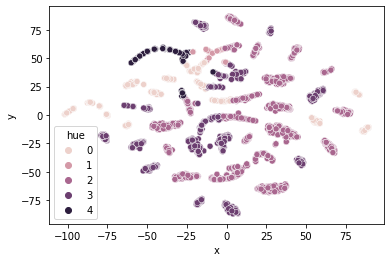

In [129]:
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding
)

# The Shape of Water

## LDA

In [130]:
#read in The Shape of Water
ShapeOfWater = pd.read_csv('ShapeOfWater.csv')
ShapeOfWater.drop(columns=['Unnamed: 0'], axis = 1, inplace = True) 
ShapeOfWater.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2018-08-29 19:59:28,Fab and I watching shape of water together and...,en,[],kjimuseum,https://twitter.com/kjimuseum/status/103495371...,False,1,0,0,"{'neg': 0.115, 'neu': 0.697, 'pos': 0.188, 'co...",0.188,0.115,0.697,0.2732
1,2018-08-29 19:43:01,📷 hellohousemouse: the shape of water model: ...,en,[],annestaggwrites,https://twitter.com/annestaggwrites/status/103...,False,0,0,0,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp...",0.218,0.000,0.782,0.5994
2,2018-08-29 19:39:36,"""The Shape of Water is like alien Amelie, but ...",en,[],TheGreenGreek,https://twitter.com/TheGreenGreek/status/10349...,False,2,0,0,"{'neg': 0.241, 'neu': 0.586, 'pos': 0.173, 'co...",0.173,0.241,0.586,-0.4953
3,2018-08-29 19:38:41,@CharlieWSwain That couple in “The Shape Of Wa...,en,[],cliffmarshall,https://twitter.com/cliffmarshall/status/10349...,False,1,0,0,"{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...",0.091,0.000,0.909,0.2960
4,2018-08-29 19:37:09,"More power to him. Sure beats the spew, prais...",en,[],biomom64,https://twitter.com/biomom64/status/1034948099...,False,0,0,0,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.188,0.000,0.812,0.7003


In [132]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in ShapeOfWater['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [134]:
#stemming tweets
stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    stemmed_tweets.append(stemmed_words)
# stemmed_tweets

In [135]:
#adding to The Shape of Water dataframe 

#stemmed tweets list version
ShapeOfWater['stemmed'] = stemmed_tweets

#string version
stemmed_tweets_str_lst = []
for tweet in ShapeOfWater['stemmed'].tolist():
    stemmed_tweets_str_lst.append(" ".join(tweet))

ShapeOfWater['string_stemmed'] = stemmed_tweets_str_lst

ShapeOfWater.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2018-08-29 19:59:28,Fab and I watching shape of water together and...,en,[],kjimuseum,https://twitter.com/kjimuseum/status/103495371...,False,1,0,0,"{'neg': 0.115, 'neu': 0.697, 'pos': 0.188, 'co...",0.188,0.115,0.697,0.2732,"[fab, watch, shape, water, togeth, hate, heada...",fab watch shape water togeth hate headass must...
1,2018-08-29 19:43:01,📷 hellohousemouse: the shape of water model: ...,en,[],annestaggwrites,https://twitter.com/annestaggwrites/status/103...,False,0,0,0,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp...",0.218,0.000,0.782,0.5994,"[hellohousemous, shape, water, model, averi, v...",hellohousemous shape water model averi vulp ro...
2,2018-08-29 19:39:36,"""The Shape of Water is like alien Amelie, but ...",en,[],TheGreenGreek,https://twitter.com/TheGreenGreek/status/10349...,False,2,0,0,"{'neg': 0.241, 'neu': 0.586, 'pos': 0.173, 'co...",0.173,0.241,0.586,-0.4953,"[shape, water, like, alien, ameli, ameli, bett...",shape water like alien ameli ameli better stil...
3,2018-08-29 19:38:41,@CharlieWSwain That couple in “The Shape Of Wa...,en,[],cliffmarshall,https://twitter.com/cliffmarshall/status/10349...,False,1,0,0,"{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...",0.091,0.000,0.909,0.2960,"[charliewswain, coupl, shape, water, babi, gre...",charliewswain coupl shape water babi grew beco...
4,2018-08-29 19:37:09,"More power to him. Sure beats the spew, prais...",en,[],biomom64,https://twitter.com/biomom64/status/1034948099...,False,0,0,0,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.188,0.000,0.812,0.7003,"[power, sure, beat, spew, prais, trump, come, ...",power sure beat spew prais trump come costar s...


In [136]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(ShapeOfWater['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000x,00pm,01297,01425612393,018,02,0215madman,02mvwewkxo,03,...,ztq9uerwad,ztxmxhuphw,zujbgxhisa,zuldim,zvk56tlfg6,zvkewslwtd,zyli,zymmetra,zyrtigppmr,zzck2vlrfz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(ShapeOfWater['stemmed'])

In [138]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in ShapeOfWater['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

In [139]:
#run LDA model for the movie The Shape of Water
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics(-1):
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.066*"water" + 0.065*"shape" + 0.021*"del" + 0.021*"toro" + 0.019*"guillermo" + 0.008*"2017" + 0.005*"win" + 0.005*"love" + 0.005*"movi" + 0.004*"like"
Topic 1 
Words: 0.057*"water" + 0.057*"shape" + 0.027*"nanotub" + 0.026*"chang" + 0.008*"love" + 0.004*"find" + 0.004*"eye" + 0.004*"heart" + 0.004*"fill" + 0.003*"come"
Topic 2 
Words: 0.054*"water" + 0.053*"shape" + 0.018*"watch" + 0.013*"best" + 0.012*"movi" + 0.009*"like" + 0.008*"pictur" + 0.007*"love" + 0.006*"film" + 0.006*"fuck"
Topic 3 
Words: 0.082*"shape" + 0.082*"water" + 0.017*"movi" + 0.013*"film" + 0.012*"watch" + 0.009*"like" + 0.007*"2017" + 0.007*"love" + 0.006*"oscar" + 0.005*"one"
Topic 4 
Words: 0.036*"water" + 0.036*"shape" + 0.004*"w" + 0.004*"watch" + 0.004*"film" + 0.003*"day" + 0.003*"monster" + 0.003*"hawkin" + 0.003*"salli" + 0.003*"youtub"


In [140]:
#display LDA model for The Shape of Water
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.085502 -0.029756       1        1  50.360223
0     -0.022650  0.132109       2        1  18.178904
2     -0.071890 -0.063755       3        1  17.314925
1      0.113419 -0.033418       4        1   8.258001
4      0.066622 -0.005180       5        1   5.887947, topic_info=         Term         Freq        Total Category  logprob  loglift
10      water  4541.000000  4541.000000  Default  30.0000  30.0000
7       shape  4514.000000  4514.000000  Default  29.0000  29.0000
113      toro   272.000000   272.000000  Default  28.0000  28.0000
108       del   282.000000   282.000000  Default  27.0000  27.0000
127   nanotub   153.000000   153.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1291     read     5.677563    65.801659   Topic5  -6.5217   0.3821
759      ladi     5.725207   110.018147   Topic5  -6.5134  -0.1235
81        man     5.777006   161.107162   Topic5  -6.5044  -0.4959
162      much     5.389081   104.091619   Topic5  -6.5739  -0.1286
165       see     5.408022   193.161260   Topic5  -6.5704  -0.7434

[382 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3749      1  0.900323           0
869       4  0.796323  0iynhri2vq
226       1  0.821777           1
226       2  0.104169           1
226       3  0.034723           1
...     ...       ...         ...
780       1  0.270757      youtub
780       2  0.398172      youtub
780       3  0.127415      youtub
780       4  0.015927      youtub
780       5  0.175196      youtub

[761 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2, 5])

## TSNE 

In [142]:
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])        
# X

In [143]:
hm = np.array(X)
hm

array([[0.9312083 , 0.01686915, 0.01747781, 0.01747659, 0.01696815],
       [0.01862323, 0.01851669, 0.0187077 , 0.9256234 , 0.01852895],
       [0.01693922, 0.01678186, 0.01699644, 0.93232566, 0.01695684],
       ...,
       [0.04095571, 0.04072052, 0.04058363, 0.59104955, 0.28669056],
       [0.18586686, 0.7802893 , 0.01121947, 0.0113137 , 0.01131064],
       [0.03384278, 0.03377988, 0.8645699 , 0.03416596, 0.03364154]],
      dtype=float32)

In [144]:
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(hm)
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = hm.argmax(axis=1)

<AxesSubplot:xlabel='x', ylabel='y'>

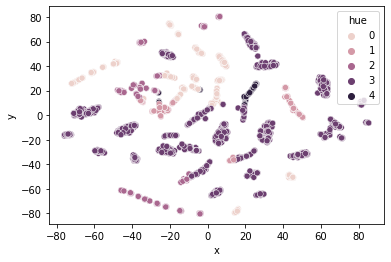

In [145]:
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding
)

# The Big Short

## LDA 

In [146]:
#read in the Big Sick
BigShort = pd.read_csv('BigShort.csv')
BigShort.drop(columns=['Unnamed: 0'], axis = 1, inplace = True) 
BigShort.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2016-12-09 18:57:58,"Just watched The Big Short. Fascinating film, ...",en,['thebigshort'],steveyroyal,https://twitter.com/steveyroyal/status/8073737...,False,0,0,0,"{'neg': 0.113, 'neu': 0.755, 'pos': 0.132, 'co...",0.132,0.113,0.755,0.1280
1,2016-12-09 18:57:57,Roger Ailes-Megyn Kelly Harassment Film in the...,en,[],RazzleTazzleMag,https://twitter.com/RazzleTazzleMag/status/807...,False,0,0,0,"{'neg': 0.194, 'neu': 0.722, 'pos': 0.083, 'co...",0.083,0.194,0.722,-0.4588
2,2016-12-09 18:56:04,The Big Short: is the next financial crisis on...,en,[],Okavangomick,https://twitter.com/Okavangomick/status/807373...,False,0,0,0,"{'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'comp...",0.000,0.272,0.728,-0.6249
3,2016-12-09 18:48:46,@BreitbartNews will it be call the Big Short I...,en,[],TimHay8,https://twitter.com/TimHay8/status/80737143968...,False,0,0,0,"{'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'comp...",0.000,0.101,0.899,-0.3089
4,2016-12-09 18:34:58,Rewatching The Big Short. Maybe you should too...,en,[],krucoff,https://twitter.com/krucoff/status/80736796980...,False,3,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000


In [148]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in BigShort['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [150]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [151]:
#adding to Big Short dataframe 

#lemmatized tweets list version
BigShort['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in BigShort['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

BigShort['string_lemmatized'] = lemmatized_tweets_str_lst

BigShort.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2016-12-09 18:57:58,"Just watched The Big Short. Fascinating film, ...",en,['thebigshort'],steveyroyal,https://twitter.com/steveyroyal/status/8073737...,False,0,0,0,"{'neg': 0.113, 'neu': 0.755, 'pos': 0.132, 'co...",0.132,0.113,0.755,0.1280,"[watched, big, short, fascinating, film, even,...",watched big short fascinating film even compre...
1,2016-12-09 18:57:57,Roger Ailes-Megyn Kelly Harassment Film in the...,en,[],RazzleTazzleMag,https://twitter.com/RazzleTazzleMag/status/807...,False,0,0,0,"{'neg': 0.194, 'neu': 0.722, 'pos': 0.083, 'co...",0.083,0.194,0.722,-0.4588,"[roger, ailes, megyn, kelly, harassment, film,...",roger ailes megyn kelly harassment film work b...
2,2016-12-09 18:56:04,The Big Short: is the next financial crisis on...,en,[],Okavangomick,https://twitter.com/Okavangomick/status/807373...,False,0,0,0,"{'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'comp...",0.000,0.272,0.728,-0.6249,"[big, short, next, financial, crisis, way, xiv...",big short next financial crisis way xiv5se7l6g
3,2016-12-09 18:48:46,@BreitbartNews will it be call the Big Short I...,en,[],TimHay8,https://twitter.com/TimHay8/status/80737143968...,False,0,0,0,"{'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'comp...",0.000,0.101,0.899,-0.3089,"[breitbartnews, call, big, short, ii, shot, ro...",breitbartnews call big short ii shot rolling c...
4,2016-12-09 18:34:58,Rewatching The Big Short. Maybe you should too...,en,[],krucoff,https://twitter.com/krucoff/status/80736796980...,False,3,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[rewatching, big, short, maybe, pwqcfw74pw]",rewatching big short maybe pwqcfw74pw


In [152]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(BigShort['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,00ksrhf6uo,00pm,00s,01937,01dkpbix9a,03,039,03cbravvpd,...,zxop2ebm2w,zxxlkbw78v,zxygjs3psa,zy3b6tizry,zyacap52vo,zybbav10jn,zybkohxdb6,zyr5zsl3jd,zys0dx7zcn,zyymx0kdv0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(BigShort['lemmatize'])

In [154]:
#bag of words
corpus = []
for tweet in BigShort['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [155]:
#run LDA model for The Big Short
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.095*"big" + 0.092*"short" + 0.020*"movie" + 0.014*"film" + 0.013*"watching" + 0.009*"work" + 0.008*"roger" + 0.008*"ailes" + 0.008*"writer" + 0.008*"via"
Topic 1 
Words: 0.051*"big" + 0.051*"short" + 0.020*"cheney" + 0.020*"dick" + 0.019*"adam" + 0.018*"mckay" + 0.013*"lewis" + 0.012*"michael" + 0.011*"money" + 0.011*"author"
Topic 2 
Words: 0.091*"big" + 0.090*"short" + 0.018*"watch" + 0.017*"movie" + 0.015*"michael" + 0.013*"lewis" + 0.011*"author" + 0.007*"watched" + 0.007*"one" + 0.006*"say"
Topic 3 
Words: 0.039*"short" + 0.039*"big" + 0.022*"poetry" + 0.015*"like" + 0.014*"people" + 0.014*"hate" + 0.012*"truth" + 0.012*"fucking" + 0.009*"game" + 0.009*"award"
Topic 4 
Words: 0.106*"big" + 0.106*"short" + 0.025*"financial" + 0.021*"next" + 0.019*"crisis" + 0.018*"movie" + 0.018*"way" + 0.011*"inside" + 0.011*"new" + 0.010*"doomsday"


In [156]:
#display LDA model for The Big Short
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.127814  0.082590       1        1  36.368760
2     -0.043338 -0.111045       2        1  27.907432
0     -0.065227 -0.024775       3        1  23.822210
1      0.136604 -0.032124       4        1   6.835456
3      0.099774  0.085353       5        1   5.066142, topic_info=          Term        Freq       Total Category  logprob  loglift
26   financial  477.000000  477.000000  Default  30.0000  30.0000
27        next  381.000000  381.000000  Default  29.0000  29.0000
169    michael  256.000000  256.000000  Default  28.0000  28.0000
28         way  323.000000  323.000000  Default  27.0000  27.0000
168      lewis  230.000000  230.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
430   watching    5.289095  296.071045   Topic5  -6.1604  -1.0424
928       bank    4.437611  108.692205   Topic5  -6.3360  -0.2158
98        feel    3.647271   52.384932   Topic5  -6.5321   0.3180
446          u    3.428684   53.908151   Topic5  -6.5939   0.2275
145      think    3.457274   73.101625   Topic5  -6.5856  -0.0688

[305 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.090215        10
0         2  0.270645        10
0         3  0.601433        10
0         5  0.045107        10
183       1  0.155316         2
...     ...       ...       ...
23        2  0.009056      work
23        3  0.968977      work
3965      1  0.996072  worrying
24        1  0.010526    writer
24        3  0.989476    writer

[506 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 1, 2, 4])

##  TSNE 

In [158]:
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [159]:
hm = np.array(X)
hm

array([[0.73104835, 0.01256202, 0.01277404, 0.2307804 , 0.01283523],
       [0.942618  , 0.01434102, 0.01435624, 0.01432035, 0.01436436],
       [0.02521313, 0.0251065 , 0.02518222, 0.02508646, 0.8994117 ],
       ...,
       [0.029186  , 0.02873801, 0.02938897, 0.02871229, 0.88397473],
       [0.01272419, 0.01259168, 0.5896709 , 0.01253556, 0.37247768],
       [0.01454385, 0.01437198, 0.01440236, 0.0143334 , 0.9423484 ]],
      dtype=float32)

In [160]:
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(hm)
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = hm.argmax(axis=1)

<AxesSubplot:xlabel='x', ylabel='y'>

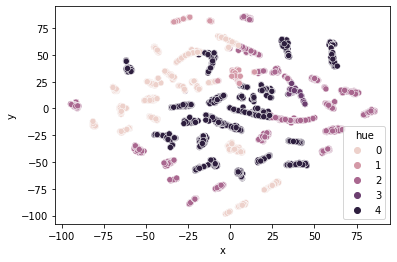

In [161]:
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)

# Cloudy With a Chance of Meatballs

## LDA

In [162]:
#read in Cloudy with a Chance of Meatballs csv
CloudywithaChanceofMeatballs = pd.read_csv('CloudywithaChanceofMeatballs.csv')
CloudywithaChanceofMeatballs.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
CloudywithaChanceofMeatballs.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2010-09-16 19:54:13,Cloudy with a chance of meatballs :),en,[],TyraMyricks,https://twitter.com/TyraMyricks/status/2470891...,False,0,0,0,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",0.500,0.0,0.500,0.6124
1,2010-09-16 19:35:21,@redshiftlove cloudy with a chance of meatball...,en,[],t8steve,https://twitter.com/t8steve/status/24707565423,False,0,0,0,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.247,0.0,0.753,0.3164
2,2010-09-16 17:27:08,I think it is officially time for me to addres...,en,[],JamesTheFourth,https://twitter.com/JamesTheFourth/status/2469...,False,0,0,0,"{'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'comp...",0.087,0.0,0.913,0.2500
3,2010-09-16 17:18:49,I got Cloudy with a Chance of Meatballs on Blu...,en,[],beandog76,https://twitter.com/beandog76/status/24698154027,False,0,0,0,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.375,0.0,0.625,0.6588
4,2010-09-16 17:17:17,@Ollievoso like in Cloudy with a Chance of Mea...,en,[],Ferrisislove,https://twitter.com/Ferrisislove/status/246980...,False,0,0,0,"{'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'comp...",0.494,0.0,0.506,0.8679


In [163]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in CloudywithaChanceofMeatballs['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

[['cloudy', 'with', 'a', 'chance', 'of', 'meatballs'],
 ['redshiftlove', 'cloudy', 'with', 'a', 'chance', 'of', 'meatballs', 'what'],
 ['i',
  'think',
  'it',
  'is',
  'officially',
  'time',
  'for',
  'me',
  'to',
  'address',
  'this',
  'whole',
  'not',
  'having',
  'seen',
  'cloudy',
  'with',
  'a',
  'chance',
  'of',
  'meatballs',
  'scenario'],
 ['i',
  'got',
  'cloudy',
  'with',
  'a',
  'chance',
  'of',
  'meatballs',
  'on',
  'blu',
  'ray',
  'woo'],
 ['ollievoso',
  'like',
  'in',
  'cloudy',
  'with',
  'a',
  'chance',
  'of',
  'meatballs',
  'that',
  'would',
  'be',
  'awesome'],
 ['cloudy',
  'with',
  'a',
  'chance',
  'of',
  'meatballs',
  'is',
  'the',
  'funniest',
  'movie',
  'i',
  'have',
  'see',
  'in',
  'a',
  'while'],
 ['i',
  'm',
  'watching',
  'cloudy',
  'with',
  'a',
  'chance',
  'of',
  'meatballs',
  'w',
  'my',
  '3',
  'year',
  'old',
  'i',
  'dig',
  'kid',
  'shows',
  'next',
  'up',
  'icarly'],
 ['the',
  'beginning'

In [165]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [166]:
#adding to Cloudy With a Chance of Meatballs dataframe 

#lemmatized tweets list version
CloudywithaChanceofMeatballs['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in CloudywithaChanceofMeatballs['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

CloudywithaChanceofMeatballs['string_lemmatized'] = lemmatized_tweets_str_lst

CloudywithaChanceofMeatballs.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2010-09-16 19:54:13,Cloudy with a chance of meatballs :),en,[],TyraMyricks,https://twitter.com/TyraMyricks/status/2470891...,False,0,0,0,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",0.500,0.0,0.500,0.6124,"[cloudy, chance, meatball]",cloudy chance meatball
1,2010-09-16 19:35:21,@redshiftlove cloudy with a chance of meatball...,en,[],t8steve,https://twitter.com/t8steve/status/24707565423,False,0,0,0,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.247,0.0,0.753,0.3164,"[redshiftlove, cloudy, chance, meatball]",redshiftlove cloudy chance meatball
2,2010-09-16 17:27:08,I think it is officially time for me to addres...,en,[],JamesTheFourth,https://twitter.com/JamesTheFourth/status/2469...,False,0,0,0,"{'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'comp...",0.087,0.0,0.913,0.2500,"[think, officially, time, address, whole, seen...",think officially time address whole seen cloud...
3,2010-09-16 17:18:49,I got Cloudy with a Chance of Meatballs on Blu...,en,[],beandog76,https://twitter.com/beandog76/status/24698154027,False,0,0,0,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.375,0.0,0.625,0.6588,"[cloudy, chance, meatball, blu, ray, woo]",cloudy chance meatball blu ray woo
4,2010-09-16 17:17:17,@Ollievoso like in Cloudy with a Chance of Mea...,en,[],Ferrisislove,https://twitter.com/Ferrisislove/status/246980...,False,0,0,0,"{'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'comp...",0.494,0.0,0.506,0.8679,"[ollievoso, like, cloudy, chance, meatball, wo...",ollievoso like cloudy chance meatball would aw...


In [167]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(CloudywithaChanceofMeatballs['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,00p,00pm,01,02,03,037,039,040,...,zodiaclife,zombieland,zomg,zonarosa,zondara,zone,zooted,zpxdhxzw6g,zrim,zshnli5q
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(CloudywithaChanceofMeatballs['lemmatize'])

In [173]:
#bag of words
corpus = []
for tweet in CloudywithaChanceofMeatballs['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [174]:
#run LDA model on Cloudy with a Chance of Meatballs
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.125*"cloudy" + 0.125*"meatball" + 0.125*"chance" + 0.033*"watching" + 0.021*"movie" + 0.008*"good" + 0.007*"park" + 0.007*"tonight" + 0.007*"watched" + 0.006*"3"
Topic 1 
Words: 0.035*"chance" + 0.035*"cloudy" + 0.034*"meatball" + 0.018*"xbox" + 0.016*"live" + 0.015*"netflix" + 0.015*"watching" + 0.010*"currently" + 0.009*"playing" + 0.009*"online"
Topic 2 
Words: 0.081*"cloudy" + 0.081*"meatball" + 0.081*"chance" + 0.014*"movie" + 0.008*"lol" + 0.007*"see" + 0.007*"watch" + 0.005*"fb" + 0.005*"watched" + 0.005*"free"
Topic 3 
Words: 0.055*"cloudy" + 0.054*"chance" + 0.054*"meatball" + 0.023*"disc" + 0.020*"edition" + 0.017*"bit" + 0.017*"single" + 0.016*"anna" + 0.015*"great" + 0.014*"faris"
Topic 4 
Words: 0.106*"cloudy" + 0.106*"chance" + 0.106*"meatball" + 0.021*"watching" + 0.020*"movie" + 0.014*"watch" + 0.012*"dvd" + 0.008*"time" + 0.008*"bit" + 0.007*"p"


In [175]:
#display LDA model on Cloudy with a Chance of Meatballs
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.092845  0.022472       1        1  36.520964
4      0.092874  0.019605       2        1  35.077891
2      0.051077 -0.018534       3        1  14.251919
3     -0.142861  0.105712       4        1   9.235625
1     -0.093935 -0.129255       5        1   4.913601, topic_info=         Term         Freq        Total Category  logprob  loglift
713      disc   102.000000   102.000000  Default  30.0000  30.0000
1      cloudy  4798.000000  4798.000000  Default  29.0000  29.0000
0      chance  4776.000000  4776.000000  Default  28.0000  28.0000
2    meatball  4774.000000  4774.000000  Default  27.0000  27.0000
979   edition    90.000000    90.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
24        kid     9.515136   132.027839   Topic5  -5.4984   0.3830
316       dvd    10.568048   250.714503   Topic5  -5.3935  -0.1533
286      haha     6.544754    66.712633   Topic5  -5.8726   0.6914
19      movie     6.636246   838.601019   Topic5  -5.8588  -1.8260
288      want     5.577703    58.989329   Topic5  -6.0325   0.6546

[327 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3485      4  0.941935        0
6260      1  0.957405      039
777       1  0.459122       10
777       3  0.516512       10
1324      1  0.316179       11
...     ...       ...      ...
289       4  0.246892    young
289       5  0.493784    young
170       3  0.947319    youtu
1434      3  0.920611  youtube
4101      3  0.778322  yyozf3y

[559 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 3, 4, 2])

## TSNE

In [180]:
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [177]:
hm = np.array(X)
hm

array([[0.79650384, 0.05040009, 0.05100263, 0.05064815, 0.05144529],
       [0.04120024, 0.04031754, 0.04071819, 0.04048144, 0.83728266],
       [0.01847476, 0.01828011, 0.01854678, 0.01847384, 0.92622447],
       ...,
       [0.06339483, 0.02881421, 0.03022893, 0.02884003, 0.848722  ],
       [0.01856912, 0.01869152, 0.51400244, 0.01828613, 0.43045077],
       [0.7125295 , 0.01844923, 0.01851913, 0.01867096, 0.23183125]],
      dtype=float32)

In [178]:
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(hm)
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = hm.argmax(axis=1)

<AxesSubplot:xlabel='x', ylabel='y'>

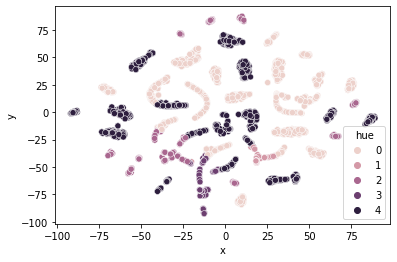

In [179]:
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)

# Wall-E

## LDA 

In [181]:
#read in Wall-E
WallE = pd.read_csv('Walle.csv')
WallE.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
WallE.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2009-06-25 19:37:09,Breaking News: Wall-E's battier has run out. H...,en,[],gawjr,https://twitter.com/gawjr/status/2335057043,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
1,2009-06-25 19:27:14,"I think my mind is too complex for WALL-E, @wu...",en,[],itsbrookekelly,https://twitter.com/itsbrookekelly/status/2334...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
2,2009-06-25 19:22:26,Bout to watch Wall-e the best movie ever!!!!,en,[],IdntKnowat2put,https://twitter.com/IdntKnowat2put/status/2334...,False,0,0,0,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...",0.434,0.0,0.566,0.7482
3,2009-06-25 19:20:48,Finally home full of micky d's n watchn wall-e,en,[],EliThunder85,https://twitter.com/EliThunder85/status/233474...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
4,2009-06-25 19:07:13,@erinichristine word to wall-e!,en,[],_paulstewart,https://twitter.com/_paulstewart/status/233449...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000


In [183]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in WallE['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [184]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

lemmatized_tweets

[['breaking',
  'news',
  'wall',
  'e',
  'battier',
  'run',
  'found',
  'transport',
  'watching',
  'hello',
  'dolly',
  'wife',
  'year',
  'eve',
  'rip',
  'wall',
  'e'],
 ['think', 'mind', 'complex', 'wall', 'e', 'wutendeskind'],
 ['bout', 'watch', 'wall', 'e', 'best', 'movie', 'ever'],
 ['finally', 'home', 'full', 'micky', 'n', 'watchn', 'wall', 'e'],
 ['erinichristine', 'word', 'wall', 'e'],
 ['danieljohnhall',
  'must',
  'say',
  'finding',
  'nemo',
  'look',
  'pretty',
  'crap',
  'try',
  'wall',
  'e',
  'see',
  'go'],
 ['saw', 'transformer', '2', 'wall', 'e', 'better', 'cgi'],
 ['zak',
  'design',
  'disney',
  'pixar',
  'wall',
  'e',
  '3',
  'piece',
  'dinnerware',
  'set',
  'bit',
  'dxxcw'],
 ['wall',
  'e',
  'blu',
  'ray',
  'couple',
  'hour',
  'ago',
  'greater',
  'level',
  'detail',
  'would',
  'probably',
  'look',
  'completely',
  'horrible',
  'wall',
  'e',
  'perfect'],
 ['watching',
  'wall',
  'e',
  'kid',
  'every',
  'pixel',
  'loving

In [185]:
#adding to Wall-E dataframe 

#lemmatized tweets list version
WallE['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in WallE['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

WallE['string_lemmatized'] = lemmatized_tweets_str_lst

WallE.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2009-06-25 19:37:09,Breaking News: Wall-E's battier has run out. H...,en,[],gawjr,https://twitter.com/gawjr/status/2335057043,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,"[breaking, news, wall, e, battier, run, found,...",breaking news wall e battier run found transpo...
1,2009-06-25 19:27:14,"I think my mind is too complex for WALL-E, @wu...",en,[],itsbrookekelly,https://twitter.com/itsbrookekelly/status/2334...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,"[think, mind, complex, wall, e, wutendeskind]",think mind complex wall e wutendeskind
2,2009-06-25 19:22:26,Bout to watch Wall-e the best movie ever!!!!,en,[],IdntKnowat2put,https://twitter.com/IdntKnowat2put/status/2334...,False,0,0,0,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...",0.434,0.0,0.566,0.7482,"[bout, watch, wall, e, best, movie, ever]",bout watch wall e best movie ever
3,2009-06-25 19:20:48,Finally home full of micky d's n watchn wall-e,en,[],EliThunder85,https://twitter.com/EliThunder85/status/233474...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,"[finally, home, full, micky, n, watchn, wall, e]",finally home full micky n watchn wall e
4,2009-06-25 19:07:13,@erinichristine word to wall-e!,en,[],_paulstewart,https://twitter.com/_paulstewart/status/233449...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,"[erinichristine, word, wall, e]",erinichristine word wall e


In [186]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(WallE['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,002,00s,01709,0317,04,05,05fj,06,...,zomg,zone,zoo,zu1ol,zulky,zygbot,zzz,zzzz,zzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(WallE['lemmatize'])

In [188]:
#bag of words
corpus = []
for tweet in WallE['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [190]:
#running LDA Wall-E model
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.088*"e" + 0.088*"wall" + 0.018*"watching" + 0.016*"love" + 0.014*"movie" + 0.011*"tinyurl" + 0.007*"want" + 0.007*"like" + 0.007*"time" + 0.007*"gt"
Topic 1 
Words: 0.089*"e" + 0.088*"wall" + 0.015*"pixar" + 0.013*"watch" + 0.011*"movie" + 0.010*"film" + 0.009*"good" + 0.008*"watched" + 0.007*"time" + 0.006*"see"
Topic 2 
Words: 0.067*"e" + 0.066*"wall" + 0.012*"watch" + 0.011*"movie" + 0.009*"good" + 0.007*"one" + 0.006*"bit" + 0.006*"better" + 0.005*"time" + 0.005*"make"
Topic 3 
Words: 0.051*"e" + 0.051*"wall" + 0.010*"best" + 0.009*"toy" + 0.009*"story" + 0.008*"hello" + 0.008*"10" + 0.008*"dolly" + 0.008*"monster" + 0.007*"year"
Topic 4 
Words: 0.117*"e" + 0.117*"wall" + 0.037*"watching" + 0.020*"movie" + 0.011*"like" + 0.009*"cute" + 0.009*"bit" + 0.007*"good" + 0.007*"time" + 0.006*"watched"


In [191]:
#display LDA Wall-E model
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.078684  0.003460       1        1  37.655829
1     -0.025548 -0.066472       2        1  24.946143
0     -0.040640  0.101541       3        1  15.909684
2     -0.005579 -0.054460       4        1  12.779516
3      0.150452  0.015931       5        1   8.708828, topic_info=            Term         Freq        Total Category  logprob  loglift
12      watching   899.000000   899.000000  Default  30.0000  30.0000
11          wall  4786.000000  4786.000000  Default  29.0000  29.0000
3              e  4802.000000  4802.000000  Default  28.0000  28.0000
23         watch   355.000000   355.000000  Default  27.0000  27.0000
123         film   144.000000   144.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
49           bit    25.125075   257.345562   Topic5  -5.1841   0.1143
128  ratatouille    16.923575    66.779618   Topic5  -5.5793   1.0681
55         pixar    19.313711   287.838480   Topic5  -5.4472  -0.2608
22         movie    21.320398   728.779833   Topic5  -5.3483  -1.0909
264         good    18.590782   331.496510   Topic5  -5.4853  -0.4401

[372 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1022      3  0.227566    000
1022      4  0.682698    000
231       1  0.082692     10
231       2  0.132306     10
231       3  0.115768     10
...     ...       ...    ...
14        2  0.059643   year
14        3  0.104376   year
14        4  0.253484   year
14        5  0.447325   year
1404      3  0.810246  yummy

[748 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 3, 4])

## TSNE 

In [193]:
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [194]:
hm = np.array(X)
hm

array([[0.01145391, 0.01145812, 0.0112804 , 0.71633315, 0.24947436],
       [0.02916819, 0.8837232 , 0.02912007, 0.02893949, 0.02904909],
       [0.02538244, 0.8979816 , 0.02543562, 0.02537445, 0.02582591],
       ...,
       [0.01682233, 0.544608  , 0.40470707, 0.01674843, 0.01711414],
       [0.01351596, 0.9459442 , 0.01351945, 0.0134709 , 0.0135495 ],
       [0.01887428, 0.9249512 , 0.01877962, 0.01850879, 0.01888613]],
      dtype=float32)

In [195]:
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(hm)
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = hm.argmax(axis=1)

<AxesSubplot:xlabel='x', ylabel='y'>

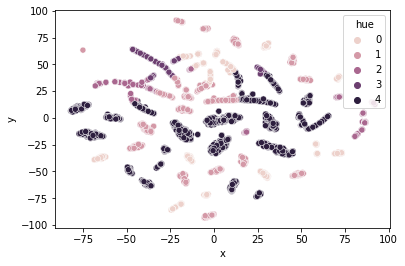

In [196]:
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)

# Slumdog Millionaire

## LDA 

In [197]:
#read in Slumdog Millionaire csv
SlumdogMillionaire = pd.read_csv('SlumdogMillionaire.csv')
SlumdogMillionaire.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
SlumdogMillionaire.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2009-11-10 18:29:55,@krael52 because shravani and keethi want to p...,en,[],GregoryRael,https://twitter.com/GregoryRael/status/5603007478,False,0,0,0,"{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'comp...",0.166,0.0,0.834,0.4574
1,2009-11-10 17:56:36,Outside with sam jefferson and my big sis... c...,en,[],Desha_c16,https://twitter.com/Desha_c16/status/5602137272,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
2,2009-11-10 17:29:05,@1heavenlyflower: OMG! my favorite movie.........,en,[],TrinaChavez,https://twitter.com/TrinaChavez/status/5601420853,False,0,0,0,"{'neg': 0.0, 'neu': 0.59, 'pos': 0.41, 'compou...",0.410,0.0,0.590,0.6331
3,2009-11-10 17:20:07,"Crapola News!, Slumdog Millionaire grabs 5 nod...",en,[],DailyNewsBuzz,https://twitter.com/DailyNewsBuzz/status/56011...,False,0,0,0,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp...",0.215,0.0,0.785,0.5093
4,2009-11-10 17:13:39,Standing in line with @lparaggio to get her vi...,en,[],isaiahheaden,https://twitter.com/isaiahheaden/status/560102...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000


In [199]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in SlumdogMillionaire['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [201]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [202]:
#adding to Slumdog Millionaire dataframe 

#lemmatized tweets list version
SlumdogMillionaire['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in SlumdogMillionaire['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

SlumdogMillionaire['string_lemmatized'] = lemmatized_tweets_str_lst

SlumdogMillionaire.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2009-11-10 18:29:55,@krael52 because shravani and keethi want to p...,en,[],GregoryRael,https://twitter.com/GregoryRael/status/5603007478,False,0,0,0,"{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'comp...",0.166,0.0,0.834,0.4574,"[krael52, shravani, keethi, want, play, wanty,...",krael52 shravani keethi want play wanty beat b...
1,2009-11-10 17:56:36,Outside with sam jefferson and my big sis... c...,en,[],Desha_c16,https://twitter.com/Desha_c16/status/5602137272,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,"[outside, sam, jefferson, big, si, chillin, po...",outside sam jefferson big si chillin porch bou...
2,2009-11-10 17:29:05,@1heavenlyflower: OMG! my favorite movie.........,en,[],TrinaChavez,https://twitter.com/TrinaChavez/status/5601420853,False,0,0,0,"{'neg': 0.0, 'neu': 0.59, 'pos': 0.41, 'compou...",0.410,0.0,0.590,0.6331,"[1heavenlyflower, omg, favorite, movie, slumdo...",1heavenlyflower omg favorite movie slumdog mil...
3,2009-11-10 17:20:07,"Crapola News!, Slumdog Millionaire grabs 5 nod...",en,[],DailyNewsBuzz,https://twitter.com/DailyNewsBuzz/status/56011...,False,0,0,0,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp...",0.215,0.0,0.785,0.5093,"[crapola, news, slumdog, millionaire, grab, 5,...",crapola news slumdog millionaire grab 5 nod eu...
4,2009-11-10 17:13:39,Standing in line with @lparaggio to get her vi...,en,[],isaiahheaden,https://twitter.com/isaiahheaden/status/560102...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,"[standing, line, lparaggio, visa, slumdog, mil...",standing line lparaggio visa slumdog millionai...


In [203]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(SlumdogMillionaire['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,01,039,04am,05,057allowances,06,07,08,085,...,zoo,zu4ak,zuko,zukoso,zumg,zvydy,zxsfj,zzzs,zzzz,zzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [204]:
##dictionary of numbers to words
dictionary = corpora.Dictionary(SlumdogMillionaire['lemmatize'])

In [205]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in SlumdogMillionaire['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [207]:
#running LDA model on Slumdog Millionaire
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.086*"slumdog" + 0.084*"millionaire" + 0.025*"movie" + 0.018*"bit" + 0.012*"watch" + 0.010*"film" + 0.008*"39" + 0.008*"boyle" + 0.007*"loo" + 0.006*"director"
Topic 1 
Words: 0.123*"millionaire" + 0.122*"slumdog" + 0.058*"watching" + 0.038*"movie" + 0.015*"time" + 0.013*"watchin" + 0.013*"good" + 0.011*"watch" + 0.010*"great" + 0.009*"love"
Topic 2 
Words: 0.045*"millionaire" + 0.044*"slumdog" + 0.016*"movie" + 0.013*"gt" + 0.012*"music" + 0.009*"quot" + 0.008*"paper" + 0.008*"plane" + 0.007*"listening" + 0.007*"loo"
Topic 3 
Words: 0.084*"millionaire" + 0.084*"slumdog" + 0.026*"good" + 0.023*"movie" + 0.015*"saw" + 0.013*"kid" + 0.012*"watching" + 0.011*"watched" + 0.010*"finally" + 0.010*"spoiled"
Topic 4 
Words: 0.081*"slumdog" + 0.071*"millionaire" + 0.047*"bit" + 0.026*"school" + 0.021*"new" + 0.020*"kid" + 0.018*"star" + 0.018*"lie" + 0.018*"marketing" + 0.017*"kim"


In [208]:
#display Slumdog Millionaire LDA model
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.117892 -0.071971       1        1  31.788000
0     -0.002835  0.007310       2        1  25.129745
4     -0.207809 -0.052150       3        1  19.657813
3      0.080282 -0.055863       4        1  16.772766
2      0.012469  0.172675       5        1   6.651676, topic_info=          Term         Freq        Total Category  logprob  loglift
48    watching  1029.000000  1029.000000  Default  30.0000  30.0000
61         bit   763.000000   763.000000  Default  29.0000  29.0000
1630    school   271.000000   271.000000  Default  28.0000  28.0000
133       good   474.000000   474.000000  Default  27.0000  27.0000
2733       lie   179.000000   179.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
2238       aka    13.865285    60.781429   Topic5  -5.4776   1.2324
307      great    18.084129   244.798750   Topic5  -5.2119   0.1049
103      right    11.161509    62.729669   Topic5  -5.6945   0.9839
85         day    10.131391    52.134033   Topic5  -5.7913   1.0721
752         gd     9.996534    70.397145   Topic5  -5.8047   0.7584

[330 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
369       2  0.947225      127
369       3  0.043056      127
811       3  0.946795   153oak
676       2  0.936424   19z1vn
173       1  0.566069        2
...     ...       ...      ...
313       3  0.019190      yes
313       4  0.191904      yes
313       5  0.019190      yes
3897      3  0.922655  yh7m2a9
2759      4  0.926653  yhfzf2x

[637 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 4, 3])

## TSNE 

In [213]:
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [210]:
hm = np.array(X)
hm

array([[0.94206125, 0.01451585, 0.01447467, 0.01450246, 0.01444576],
       [0.93189657, 0.0174032 , 0.01705665, 0.01687074, 0.0167728 ],
       [0.4267935 , 0.48641244, 0.02894435, 0.02901637, 0.02883335],
       ...,
       [0.0290163 , 0.8820152 , 0.02872275, 0.0293166 , 0.03092915],
       [0.02976135, 0.3724233 , 0.02870839, 0.02983221, 0.53927475],
       [0.01897077, 0.01895704, 0.01907588, 0.37743515, 0.56556123]],
      dtype=float32)

In [211]:
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(hm)
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = hm.argmax(axis=1)

<AxesSubplot:xlabel='x', ylabel='y'>

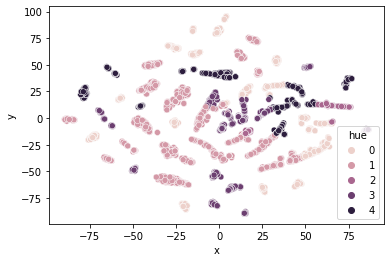

In [212]:
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)

# Bird Box

## LDA 

In [214]:
#read in Bird Box csv
BirdBox = pd.read_csv('BirdBox.csv')
BirdBox.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
BirdBox.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2019-12-12 18:55:11,Lil Natty &amp; Thunda ft. Travis World &amp; ...,en,"['caribbeansessions', 'pressplay']",CaribSessions,https://twitter.com/CaribSessions/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'comp...",0.062,0.000,0.938,0.2023
1,2019-12-12 18:48:41,I also stopped and ended up buying the Angry B...,en,[],nerdboner,https://twitter.com/nerdboner/status/120527329...,False,1,0,0,"{'neg': 0.242, 'neu': 0.522, 'pos': 0.236, 'co...",0.236,0.242,0.522,-0.0587
2,2019-12-12 18:37:12,I know I'm doing really well but part of me ju...,en,[],Antalya_Bird,https://twitter.com/Antalya_Bird/status/120527...,False,1,0,0,"{'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'comp...",0.078,0.000,0.922,0.1770
3,2019-12-12 18:35:24,K News - Olympia underground record label Fair...,en,[],K_recs,https://twitter.com/K_recs/status/120526995400...,False,1,0,1,"{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'comp...",0.082,0.000,0.918,0.3802
4,2019-12-12 18:34:14,@RuthsBestBoy I'd like to commission an all-ye...,en,[],DanaGavin1895,https://twitter.com/DanaGavin1895/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'comp...",0.233,0.000,0.767,0.9313


In [216]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in BirdBox['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [218]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [219]:
#adding to Bird Box dataframe 

#lemmatized tweets list version
BirdBox['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in BirdBox['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

BirdBox['string_lemmatized'] = lemmatized_tweets_str_lst

BirdBox.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2019-12-12 18:55:11,Lil Natty &amp; Thunda ft. Travis World &amp; ...,en,"['caribbeansessions', 'pressplay']",CaribSessions,https://twitter.com/CaribSessions/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'comp...",0.062,0.000,0.938,0.2023,"[lil, natty, thunda, ft, travis, world, julius...",lil natty thunda ft travis world julius czar g...
1,2019-12-12 18:48:41,I also stopped and ended up buying the Angry B...,en,[],nerdboner,https://twitter.com/nerdboner/status/120527329...,False,1,0,0,"{'neg': 0.242, 'neu': 0.522, 'pos': 0.236, 'co...",0.236,0.242,0.522,-0.0587,"[also, stopped, ended, buying, angry, bird, st...",also stopped ended buying angry bird star war ...
2,2019-12-12 18:37:12,I know I'm doing really well but part of me ju...,en,[],Antalya_Bird,https://twitter.com/Antalya_Bird/status/120527...,False,1,0,0,"{'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'comp...",0.078,0.000,0.922,0.1770,"[know, really, well, part, really, want, eat, ...",know really well part really want eat whole bo...
3,2019-12-12 18:35:24,K News - Olympia underground record label Fair...,en,[],K_recs,https://twitter.com/K_recs/status/120526995400...,False,1,0,1,"{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'comp...",0.082,0.000,0.918,0.3802,"[k, news, olympia, underground, record, label,...",k news olympia underground record label fair b...
4,2019-12-12 18:34:14,@RuthsBestBoy I'd like to commission an all-ye...,en,[],DanaGavin1895,https://twitter.com/DanaGavin1895/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'comp...",0.233,0.000,0.767,0.9313,"[ruthsbestboy, like, commission, year, round, ...",ruthsbestboy like commission year round box sa...


In [220]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(BirdBox['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,00012,009,00pm,00usdvrf2u,01,01293,01298,01664,...,zwsoh1p0ce,zwu5qdtzbv,zxqpyu0d8g,zxsrswu7qq,zygoluiruc,zyp551lsw9,zzibaim,zzn31fssl2,zzrfvlibi2,zztrlcq1nz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [221]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(BirdBox['lemmatize'])

In [222]:
#bag of words
corpus = []
for tweet in BirdBox['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [223]:
#running Bird Box LDA model 
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.038*"bird" + 0.037*"box" + 0.013*"birdbox" + 0.006*"via" + 0.005*"like" + 0.005*"trinket" + 0.004*"netflix" + 0.004*"million" + 0.004*"vintage" + 0.004*"news"
Topic 1 
Words: 0.047*"box" + 0.045*"bird" + 0.011*"watch" + 0.007*"birdbox" + 0.007*"movie" + 0.007*"gift" + 0.006*"wooden" + 0.006*"bobo" + 0.006*"via" + 0.005*"check"
Topic 2 
Words: 0.040*"bird" + 0.039*"box" + 0.031*"birdbox" + 0.011*"like" + 0.007*"gt" + 0.006*"one" + 0.005*"see" + 0.004*"movie" + 0.004*"watch" + 0.004*"netflix"
Topic 3 
Words: 0.068*"news" + 0.038*"today" + 0.037*"usa" + 0.026*"box" + 0.025*"bird" + 0.020*"netflix" + 0.020*"amazon" + 0.019*"google" + 0.019*"health" + 0.019*"quote"
Topic 4 
Words: 0.073*"box" + 0.072*"bird" + 0.011*"birdbox" + 0.007*"moviemenfess" + 0.006*"year" + 0.005*"movie" + 0.005*"like" + 0.004*"soca" + 0.004*"watching" + 0.004*"7"


In [224]:
#displaying Bird Box LDA modelb
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.093560 -0.113587       1        1  32.486344
3     -0.235520 -0.028675       2        1  20.064297
2      0.081220 -0.005338       3        1  19.390268
1      0.069056  0.071535       4        1  14.324573
0     -0.008316  0.076065       5        1  13.734519, topic_info=           Term         Freq        Total Category  logprob  loglift
60         news  1079.000000  1079.000000  Default  30.0000  30.0000
1168        usa   579.000000   579.000000  Default  29.0000  29.0000
152       today   607.000000   607.000000  Default  28.0000  28.0000
1151     amazon   317.000000   317.000000  Default  27.0000  27.0000
1154     health   308.000000   308.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
152       today    33.334680   607.776912   Topic5  -5.7365  -0.9180
175        last    28.253269   382.017968   Topic5  -5.9019  -0.6190
797   community    19.319877   110.717047   Topic5  -6.2820   0.2394
1168        usa    23.917642   579.274519   Topic5  -6.0685  -1.2019
565        gift    19.346404   159.982187   Topic5  -6.2806  -0.1273

[333 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
10091      3  0.929578    020
491        1  0.418928      1
491        2  0.045536      1
491        3  0.355178      1
491        4  0.100178      1
...      ...       ...    ...
89         4  0.030781   year
89         5  0.066693   year
5231       1  0.088983  zebra
5231       3  0.088983  zebra
5231       4  0.800843  zebra

[665 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 2, 1])

## TSNE 

In [225]:
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
X

[[0.01183934, 0.011918356, 0.012037142, 0.011818571, 0.9523866],
 [0.016908811, 0.33950529, 0.017095955, 0.016761497, 0.6097284],
 [0.04066525, 0.040894426, 0.8363278, 0.04048754, 0.041624952],
 [0.0336599, 0.8642231, 0.034220506, 0.033643164, 0.03425327],
 [0.01834107, 0.01845378, 0.9263819, 0.018325213, 0.018498076],
 [0.06776646, 0.068076946, 0.067837656, 0.06738609, 0.7289328],
 [0.028873587, 0.88401645, 0.029047638, 0.028821087, 0.029241253],
 [0.015568969, 0.01586349, 0.016083576, 0.6614655, 0.29101843],
 [0.01013251, 0.010109921, 0.010168388, 0.1509872, 0.81860197],
 [0.523913, 0.014456859, 0.014756939, 0.014436312, 0.43243685],
 [0.029123984, 0.028846294, 0.029041791, 0.028731037, 0.88425684],
 [0.040388845, 0.040462665, 0.04040528, 0.0402888, 0.8384544],
 [0.067190245, 0.06699834, 0.73190504, 0.06680516, 0.06710123],
 [0.03367416, 0.8650631, 0.03369231, 0.033571094, 0.033999387],
 [0.029282684, 0.028924868, 0.029119603, 0.035412226, 0.8772606],
 [0.015517261, 0.01560051, 0.015

In [226]:
hm = np.array(X)
hm

array([[0.01183934, 0.01191836, 0.01203714, 0.01181857, 0.9523866 ],
       [0.01690881, 0.33950529, 0.01709596, 0.0167615 , 0.6097284 ],
       [0.04066525, 0.04089443, 0.8363278 , 0.04048754, 0.04162495],
       ...,
       [0.94584167, 0.01348345, 0.01369515, 0.01342322, 0.01355651],
       [0.05058833, 0.05071764, 0.05061853, 0.05041422, 0.7976613 ],
       [0.01686326, 0.01754609, 0.01680959, 0.01673129, 0.9320498 ]],
      dtype=float32)

In [227]:
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(hm)
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = hm.argmax(axis=1)

<AxesSubplot:xlabel='x', ylabel='y'>

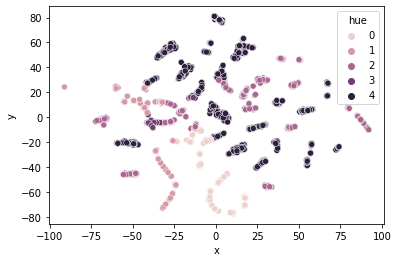

In [228]:
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)

# Silver Linings Playbook

## LDA 

In [229]:
#read in Silver Linings Playbook csv
SilverLiningsPlaybook = pd.read_csv('SilverLiningsPlaybook.csv')
SilverLiningsPlaybook.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
SilverLiningsPlaybook.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2019-12-12 18:55:11,Lil Natty &amp; Thunda ft. Travis World &amp; ...,en,"['caribbeansessions', 'pressplay']",CaribSessions,https://twitter.com/CaribSessions/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'comp...",0.062,0.000,0.938,0.2023
1,2019-12-12 18:48:41,I also stopped and ended up buying the Angry B...,en,[],nerdboner,https://twitter.com/nerdboner/status/120527329...,False,1,0,0,"{'neg': 0.242, 'neu': 0.522, 'pos': 0.236, 'co...",0.236,0.242,0.522,-0.0587
2,2019-12-12 18:37:12,I know I'm doing really well but part of me ju...,en,[],Antalya_Bird,https://twitter.com/Antalya_Bird/status/120527...,False,1,0,0,"{'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'comp...",0.078,0.000,0.922,0.1770
3,2019-12-12 18:35:24,K News - Olympia underground record label Fair...,en,[],K_recs,https://twitter.com/K_recs/status/120526995400...,False,1,0,1,"{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'comp...",0.082,0.000,0.918,0.3802
4,2019-12-12 18:34:14,@RuthsBestBoy I'd like to commission an all-ye...,en,[],DanaGavin1895,https://twitter.com/DanaGavin1895/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'comp...",0.233,0.000,0.767,0.9313


In [231]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in SilverLiningsPlaybook['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [233]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [234]:
#adding to Silver Linings Playbook dataframe 

#lemmatized tweets list version
SilverLiningsPlaybook['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in SilverLiningsPlaybook['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

SilverLiningsPlaybook['string_lemmatized'] = lemmatized_tweets_str_lst

SilverLiningsPlaybook.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2019-12-12 18:55:11,Lil Natty &amp; Thunda ft. Travis World &amp; ...,en,"['caribbeansessions', 'pressplay']",CaribSessions,https://twitter.com/CaribSessions/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'comp...",0.062,0.000,0.938,0.2023,"[lil, natty, thunda, ft, travis, world, julius...",lil natty thunda ft travis world julius czar g...
1,2019-12-12 18:48:41,I also stopped and ended up buying the Angry B...,en,[],nerdboner,https://twitter.com/nerdboner/status/120527329...,False,1,0,0,"{'neg': 0.242, 'neu': 0.522, 'pos': 0.236, 'co...",0.236,0.242,0.522,-0.0587,"[also, stopped, ended, buying, angry, bird, st...",also stopped ended buying angry bird star war ...
2,2019-12-12 18:37:12,I know I'm doing really well but part of me ju...,en,[],Antalya_Bird,https://twitter.com/Antalya_Bird/status/120527...,False,1,0,0,"{'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'comp...",0.078,0.000,0.922,0.1770,"[know, really, well, part, really, want, eat, ...",know really well part really want eat whole bo...
3,2019-12-12 18:35:24,K News - Olympia underground record label Fair...,en,[],K_recs,https://twitter.com/K_recs/status/120526995400...,False,1,0,1,"{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'comp...",0.082,0.000,0.918,0.3802,"[k, news, olympia, underground, record, label,...",k news olympia underground record label fair b...
4,2019-12-12 18:34:14,@RuthsBestBoy I'd like to commission an all-ye...,en,[],DanaGavin1895,https://twitter.com/DanaGavin1895/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'comp...",0.233,0.000,0.767,0.9313,"[ruthsbestboy, like, commission, year, round, ...",ruthsbestboy like commission year round box sa...


In [235]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(SilverLiningsPlaybook['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,00012,009,00pm,00usdvrf2u,01,01293,01298,01664,...,zwsoh1p0ce,zwu5qdtzbv,zxqpyu0d8g,zxsrswu7qq,zygoluiruc,zyp551lsw9,zzibaim,zzn31fssl2,zzrfvlibi2,zztrlcq1nz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [236]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(SilverLiningsPlaybook['lemmatize'])

In [237]:
#bag of words
corpus = []
for tweet in SilverLiningsPlaybook['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [238]:
#run LDA model on Silver Linings Playbook
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.064*"news" + 0.035*"today" + 0.035*"usa" + 0.028*"bird" + 0.028*"box" + 0.019*"netflix" + 0.019*"amazon" + 0.019*"google" + 0.018*"health" + 0.018*"credit"
Topic 1 
Words: 0.052*"bird" + 0.049*"box" + 0.009*"birdbox" + 0.008*"gt" + 0.005*"scary" + 0.004*"iduenw09wh" + 0.004*"movie" + 0.004*"star" + 0.004*"ticket" + 0.004*"netflix"
Topic 2 
Words: 0.036*"bird" + 0.035*"box" + 0.013*"birdbox" + 0.010*"soca" + 0.007*"world" + 0.007*"playing" + 0.007*"julius" + 0.007*"czar" + 0.006*"2019" + 0.006*"7"
Topic 3 
Words: 0.048*"bird" + 0.047*"box" + 0.012*"birdbox" + 0.009*"like" + 0.006*"via" + 0.004*"see" + 0.004*"thing" + 0.004*"movie" + 0.004*"check" + 0.004*"ebay"
Topic 4 
Words: 0.065*"box" + 0.062*"bird" + 0.022*"birdbox" + 0.009*"like" + 0.006*"movie" + 0.006*"year" + 0.006*"one" + 0.005*"watching" + 0.004*"netflix" + 0.004*"time"


In [239]:
#Display LDA model on Silver Linings Playbook
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.075953  0.057321       1        1  35.467096
0      0.261312  0.013045       2        1  22.297329
1     -0.071300  0.029132       3        1  16.028832
3     -0.070612  0.047885       4        1  15.686654
2     -0.043446 -0.147384       5        1  10.520089, topic_info=        Term         Freq        Total Category  logprob  loglift
60      news  1092.000000  1092.000000  Default  30.0000  30.0000
1168     usa   586.000000   586.000000  Default  29.0000  29.0000
152    today   616.000000   616.000000  Default  28.0000  28.0000
1078  google   317.000000   317.000000  Default  27.0000  27.0000
1152  credit   311.000000   311.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
399    watch    25.163678   248.545001   Topic5  -5.7511  -0.0383
565     gift    21.427860   161.817459   Topic5  -5.9118   0.2301
1062  wooden    18.221962    93.954620   Topic5  -6.0739   0.6117
27      star    16.750484    88.945024   Topic5  -6.1581   0.5823
78      like    16.899080   415.880705   Topic5  -6.1493  -0.9513

[326 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
10091      3  0.972896   020
491        1  0.592316     1
491        2  0.143592     1
491        3  0.161541     1
491        4  0.098719     1
...      ...       ...   ...
89         5  0.025491  year
2421       1  0.130403  yoda
2421       2  0.065201  yoda
2421       4  0.782418  yoda
2421       5  0.065201  yoda

[696 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 2, 4, 3])

## TSNE

In [244]:
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [241]:
hm = np.array(X)
hm

array([[0.01181905, 0.01209193, 0.01201001, 0.01189766, 0.95218134],
       [0.01674931, 0.01699234, 0.01681633, 0.01692776, 0.93251425],
       [0.04024493, 0.04079074, 0.04047511, 0.04111893, 0.83737034],
       ...,
       [0.01347228, 0.01348609, 0.01344202, 0.01353753, 0.946062  ],
       [0.0505066 , 0.05089686, 0.05064158, 0.05086124, 0.79709375],
       [0.01677191, 0.9326129 , 0.01675845, 0.01701222, 0.01684455]],
      dtype=float32)

In [242]:
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(hm)
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = hm.argmax(axis=1)

<AxesSubplot:xlabel='x', ylabel='y'>

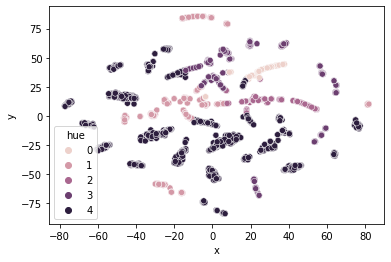

In [243]:
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)

# Django Unchained

## LDA 

In [245]:
#read in Django Unchained csv
DjangoUnchained = pd.read_csv('DjangoUnchained.csv')
DjangoUnchained.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
DjangoUnchained.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2013-12-23 18:44:22,Django Unchained is brilliant #topfilm,en,['topfilm'],Jacobbck_,https://twitter.com/Jacobbck_/status/415266664...,False,2,0,0,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.487,0.000,0.513,0.5859
1,2013-12-23 18:31:11,Every 10 seconds in Django Unchained you hear ...,en,[],Umaarrr_,https://twitter.com/Umaarrr_/status/4152633444...,False,0,0,0,"{'neg': 0.301, 'neu': 0.699, 'pos': 0.0, 'comp...",0.000,0.301,0.699,-0.6486
2,2013-12-23 18:26:03,Cause I will be a problem. I’m talking Django ...,en,[],DeShayFromVA,https://twitter.com/DeShayFromVA/status/415262...,False,0,0,0,"{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...",0.000,0.231,0.769,-0.4019
3,2013-12-23 18:16:54,White house down... Man of steel... Monsters U...,en,[],Mystic_Sk,https://twitter.com/Mystic_Sk/status/415259749...,False,0,2,0,"{'neg': 0.177, 'neu': 0.823, 'pos': 0.0, 'comp...",0.000,0.177,0.823,-0.4767
4,2013-12-23 18:15:53,on a movie scale of 'm night shamalyans the vi...,en,[],dboyyfresh,https://twitter.com/dboyyfresh/status/41525949...,False,1,0,0,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",0.000,0.167,0.833,-0.6124


In [248]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in DjangoUnchained['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [250]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [251]:
#adding to Django Unchained dataframe 

#lemmatized tweets list version
DjangoUnchained['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in DjangoUnchained['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

DjangoUnchained['string_lemmatized'] = lemmatized_tweets_str_lst

DjangoUnchained.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2013-12-23 18:44:22,Django Unchained is brilliant #topfilm,en,['topfilm'],Jacobbck_,https://twitter.com/Jacobbck_/status/415266664...,False,2,0,0,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.487,0.000,0.513,0.5859,"[django, unchained, brilliant, topfilm]",django unchained brilliant topfilm
1,2013-12-23 18:31:11,Every 10 seconds in Django Unchained you hear ...,en,[],Umaarrr_,https://twitter.com/Umaarrr_/status/4152633444...,False,0,0,0,"{'neg': 0.301, 'neu': 0.699, 'pos': 0.0, 'comp...",0.000,0.301,0.699,-0.6486,"[every, 10, second, django, unchained, hear, w...",every 10 second django unchained hear word nigger
2,2013-12-23 18:26:03,Cause I will be a problem. I’m talking Django ...,en,[],DeShayFromVA,https://twitter.com/DeShayFromVA/status/415262...,False,0,0,0,"{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...",0.000,0.231,0.769,-0.4019,"[cause, problem, talking, django, unchained]",cause problem talking django unchained
3,2013-12-23 18:16:54,White house down... Man of steel... Monsters U...,en,[],Mystic_Sk,https://twitter.com/Mystic_Sk/status/415259749...,False,0,2,0,"{'neg': 0.177, 'neu': 0.823, 'pos': 0.0, 'comp...",0.000,0.177,0.823,-0.4767,"[white, house, man, steel, monster, university...",white house man steel monster university lone ...
4,2013-12-23 18:15:53,on a movie scale of 'm night shamalyans the vi...,en,[],dboyyfresh,https://twitter.com/dboyyfresh/status/41525949...,False,1,0,0,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",0.000,0.167,0.833,-0.6124,"[movie, scale, night, shamalyans, village, dja...",movie scale night shamalyans village django un...


In [252]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(DjangoUnchained['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,00pm,02,04kov4vvzo,05,06,06troop21,07mwjfqial,08,...,zwlwqncs9i,zwnsrvu2sj,zx77nzpcsi,zx9y3vegjs,zxxgwmoq1t,zybpmuiu0h,zzdecom3wz,zzdu49y8g7,zzk2ayss92,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [253]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(DjangoUnchained['lemmatize'])

In [254]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in DjangoUnchained['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [256]:
#running LDA model for Django Unchained
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.089*"django" + 0.086*"unchained" + 0.025*"movie" + 0.018*"watching" + 0.012*"good" + 0.012*"djangounchained" + 0.010*"watch" + 0.008*"time" + 0.008*"finally" + 0.007*"gt"
Topic 1 
Words: 0.081*"django" + 0.079*"unchained" + 0.019*"nigga" + 0.016*"watch" + 0.014*"3" + 0.012*"movie" + 0.012*"like" + 0.009*"film" + 0.008*"2" + 0.007*"die"
Topic 2 
Words: 0.082*"django" + 0.080*"unchained" + 0.010*"movie" + 0.008*"djangounchained" + 0.008*"ray" + 0.008*"blu" + 0.007*"youtube" + 0.006*"copy" + 0.006*"soundtrack" + 0.006*"watched"
Topic 3 
Words: 0.055*"django" + 0.054*"unchained" + 0.015*"djangounchained" + 0.013*"freedom" + 0.009*"used" + 0.008*"light" + 0.008*"moonlight" + 0.007*"anthony" + 0.007*"giant" + 0.007*"soundtrack"
Topic 4 
Words: 0.111*"django" + 0.109*"unchained" + 0.023*"film" + 0.021*"watching" + 0.020*"movie" + 0.014*"best" + 0.013*"tarantino" + 0.009*"time" + 0.008*"djangounchained" + 0.007*"quentin"


In [257]:
#display LDA model for Django Unchained
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.085641 -0.042808       1        1  35.362134
1     -0.029519  0.098468       2        1  19.931228
2      0.013056  0.079881       3        1  17.648284
0     -0.049727 -0.093159       4        1  17.455958
3      0.151831 -0.042382       5        1   9.602396, topic_info=         Term        Freq       Total Category  logprob  loglift
65      nigga  171.000000  171.000000  Default  30.0000  30.0000
90   watching  475.000000  475.000000  Default  29.0000  29.0000
70          3  147.000000  147.000000  Default  28.0000  28.0000
168     watch  295.000000  295.000000  Default  27.0000  27.0000
243      best  238.000000  238.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
155      year   14.430810  192.832808   Topic5  -5.6727  -0.2493
198     slave   12.057120   77.718365   Topic5  -5.8524   0.4797
460     great   12.708059  135.558086   Topic5  -5.7998  -0.0240
616        gt   11.614595   71.432235   Topic5  -5.8898   0.5267
44       film   11.862245  467.265091   Topic5  -5.8687  -1.3304

[350 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
68        1  0.152494           1
68        2  0.559145           1
68        3  0.010166           1
68        4  0.152494           1
68        5  0.142328           1
...     ...       ...         ...
110       3  0.475904     youtube
110       4  0.114873     youtube
110       5  0.180515     youtube
1572      1  0.823521  zo8k55udc7
1592      2  0.837590  zul9gldp8p

[627 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 3, 1, 4])

## TSNE 

In [262]:
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [259]:
hm = np.array(X)
hm

array([[0.04059288, 0.37059683, 0.04053425, 0.04036061, 0.50791544],
       [0.02255512, 0.9093114 , 0.0228482 , 0.02247246, 0.02281282],
       [0.03388231, 0.03392929, 0.8646701 , 0.03359304, 0.03392528],
       ...,
       [0.02013737, 0.9187199 , 0.02067535, 0.02016683, 0.02030054],
       [0.01207466, 0.01208211, 0.01186734, 0.01218604, 0.95178986],
       [0.01847853, 0.01844425, 0.20691194, 0.01845193, 0.7377134 ]],
      dtype=float32)

In [260]:
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(hm)
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = hm.argmax(axis=1)

<AxesSubplot:xlabel='x', ylabel='y'>

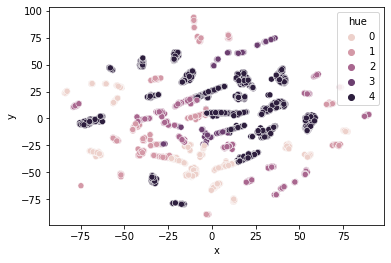

In [261]:
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)

# Hocus Pocus

## LDA 

In [263]:
#read in Hocus Pocus csv
HocusPocus = pd.read_csv('HocusPocus.csv')
HocusPocus.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
HocusPocus.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2015-09-29 19:57:07,"@WarlockTriqz Hocus Pocus, Halloween Town, Nig...",en,[],veroicone,https://twitter.com/veroicone/status/649010043...,False,0,1,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
1,2015-09-29 19:53:43,hocus pocus and chill fall edition lmao #justk...,en,"['justkidding', 'idonthavefriends']",lyaanneeee,https://twitter.com/lyaanneeee/status/64900918...,False,0,0,0,"{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'comp...",0.328,0.000,0.672,0.5994
2,2015-09-29 19:52:13,I tried REAAALLLLYYYY hard not to watch it bef...,en,['hocuspocus'],BryceFSU,https://twitter.com/BryceFSU/status/6490088129...,False,0,0,0,"{'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'comp...",0.000,0.085,0.915,-0.1260
3,2015-09-29 19:50:49,Hocus Pocus and chill,en,[],estherabinowitz,https://twitter.com/estherabinowitz/status/649...,False,10,0,6,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
4,2015-09-29 19:49:05,"#bravobag Carlton: eye of newt, the chalice Du...",en,['bravobag'],MrCJHarper,https://twitter.com/MrCJHarper/status/64900802...,False,6,0,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000


In [266]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in HocusPocus['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [267]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [268]:
#adding to Hocus Pocus dataframe 

#lemmatized tweets list version
HocusPocus['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in HocusPocus['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

HocusPocus['string_lemmatized'] = lemmatized_tweets_str_lst

HocusPocus.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2015-09-29 19:57:07,"@WarlockTriqz Hocus Pocus, Halloween Town, Nig...",en,[],veroicone,https://twitter.com/veroicone/status/649010043...,False,0,1,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[warlocktriqz, hocus, pocus, halloween, town, ...",warlocktriqz hocus pocus halloween town nightm...
1,2015-09-29 19:53:43,hocus pocus and chill fall edition lmao #justk...,en,"['justkidding', 'idonthavefriends']",lyaanneeee,https://twitter.com/lyaanneeee/status/64900918...,False,0,0,0,"{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'comp...",0.328,0.000,0.672,0.5994,"[hocus, pocus, chill, fall, edition, lmao, jus...",hocus pocus chill fall edition lmao justkiddin...
2,2015-09-29 19:52:13,I tried REAAALLLLYYYY hard not to watch it bef...,en,['hocuspocus'],BryceFSU,https://twitter.com/BryceFSU/status/6490088129...,False,0,0,0,"{'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'comp...",0.000,0.085,0.915,-0.1260,"[tried, reaaallllyyyy, hard, watch, october, w...",tried reaaallllyyyy hard watch october wait ho...
3,2015-09-29 19:50:49,Hocus Pocus and chill,en,[],estherabinowitz,https://twitter.com/estherabinowitz/status/649...,False,10,0,6,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[hocus, pocus, chill]",hocus pocus chill
4,2015-09-29 19:49:05,"#bravobag Carlton: eye of newt, the chalice Du...",en,['bravobag'],MrCJHarper,https://twitter.com/MrCJHarper/status/64900802...,False,6,0,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[bravobag, carlton, eye, newt, chalice, dumble...",bravobag carlton eye newt chalice dumbledore d...


In [269]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(HocusPocus['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,00a,00pm,00s,01482,01cxk29vzb,02,02nbak11r6,0402,...,zv6buo922v,zvan5afsq5,zvustfvuhm,zvwejhk6tv,zwbzqkv82e,zwraxlatep,zx34oqllj3,zxpnxqda2z,zy5vw0ik6p,zywf3p9uhm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [270]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(HocusPocus['lemmatize'])

In [271]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in HocusPocus['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [272]:
#running LDA model for Hocus Pocus
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.120*"hocus" + 0.120*"pocus" + 0.020*"chill" + 0.011*"halloweentown" + 0.011*"disney" + 0.010*"halloween" + 0.008*"movie" + 0.006*"wait" + 0.005*"watch" + 0.005*"netflix"
Topic 1 
Words: 0.102*"pocus" + 0.102*"hocus" + 0.029*"watch" + 0.012*"halloween" + 0.012*"hocuspocus" + 0.010*"like" + 0.009*"want" + 0.007*"love" + 0.007*"show" + 0.007*"wanna"
Topic 2 
Words: 0.079*"hocus" + 0.079*"pocus" + 0.031*"halloween" + 0.022*"watch" + 0.020*"movie" + 0.019*"hocuspocus" + 0.016*"never" + 0.012*"gt" + 0.011*"october" + 0.010*"seen"
Topic 3 
Words: 0.098*"hocus" + 0.097*"pocus" + 0.022*"watching" + 0.020*"halloween" + 0.018*"movie" + 0.018*"time" + 0.009*"fall" + 0.007*"hocuspocus" + 0.007*"favorite" + 0.007*"first"
Topic 4 
Words: 0.044*"hocus" + 0.044*"pocus" + 0.034*"put" + 0.031*"spell" + 0.027*"well" + 0.023*"remember" + 0.021*"hocuspocus" + 0.009*"sister" + 0.008*"sanderson" + 0.007*"halloween"


In [273]:
# Display model for Hocus Pocus
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.051371  0.033495       1        1  27.836581
0      0.045585  0.090237       2        1  25.333305
3      0.037693  0.000084       3        1  20.545256
2      0.046258 -0.124300       4        1  18.382972
4     -0.180907  0.000483       5        1   7.901886, topic_info=          Term        Freq       Total Category  logprob  loglift
121        put  127.000000  127.000000  Default  30.0000  30.0000
122      spell  114.000000  114.000000  Default  29.0000  29.0000
9        chill  244.000000  244.000000  Default  28.0000  28.0000
968       well  101.000000  101.000000  Default  27.0000  27.0000
1539  remember   84.000000   84.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
170      first    8.797097   81.184038   Topic5  -6.0016   0.3158
38       photo    6.537976   28.371805   Topic5  -6.2984   1.0703
127     disney    9.809980  147.523427   Topic5  -5.8926  -0.1725
58    watching    9.319572  325.647933   Topic5  -5.9439  -1.0156
838      would    7.046010   49.537715   Topic5  -6.2236   0.5878

[336 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
91        1  0.120821        1
91        2  0.120821        1
91        3  0.327943        1
91        4  0.189862        1
91        5  0.258902        1
...     ...       ...      ...
390       4  0.162196      yet
615       1  0.314888  youtube
615       2  0.645521  youtube
615       3  0.015744  youtube
615       5  0.031489  youtube

[624 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3, 5])

## TSNE

In [ ]:
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])        
# X

In [276]:
hm = np.array(X)
hm

array([[0.33482763, 0.01692926, 0.61445445, 0.01690289, 0.01688574],
       [0.9097401 , 0.02265934, 0.02249362, 0.02280308, 0.02230388],
       [0.0224806 , 0.02253412, 0.9101391 , 0.02245816, 0.02238799],
       ...,
       [0.4034658 , 0.5209821 , 0.02518965, 0.02523354, 0.02512887],
       [0.21258865, 0.01872107, 0.01857711, 0.73186994, 0.01824327],
       [0.24552986, 0.6680071 , 0.02883008, 0.02888928, 0.02874365]],
      dtype=float32)

In [ ]:
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(hm)
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = hm.argmax(axis=1)

In [ ]:
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)